# Part 1: Data Prepossessing

In [3]:
import pandas as pd

# URLs of the CSV files (which are saved into my personal GitHub)
test_url = "https://raw.githubusercontent.com/neilaxu/schulich_data_science/main/DS2/Assignment%201/test.csv"
train_url = "https://raw.githubusercontent.com/neilaxu/schulich_data_science/main/DS2/Assignment%201/train.csv"

# Load the CSV files directly from the URLs
test_data = pd.read_csv(test_url, delimiter=';')
train_data = pd.read_csv(train_url, delimiter=';')

# Display the first few rows of each dataset
print("Test data:")
print(test_data.head())

print("\nTrain data:")
print(train_data.head())

Test data:
   age          job  marital  education default  balance housing loan  \
0   30   unemployed  married    primary      no     1787      no   no   
1   33     services  married  secondary      no     4789     yes  yes   
2   35   management   single   tertiary      no     1350     yes   no   
3   30   management  married   tertiary      no     1476     yes  yes   
4   59  blue-collar  married  secondary      no        0     yes   no   

    contact  day month  duration  campaign  pdays  previous poutcome   y  
0  cellular   19   oct        79         1     -1         0  unknown  no  
1  cellular   11   may       220         1    339         4  failure  no  
2  cellular   16   apr       185         1    330         1  failure  no  
3   unknown    3   jun       199         4     -1         0  unknown  no  
4   unknown    5   may       226         1     -1         0  unknown  no  

Train data:
   age           job  marital  education default  balance housing loan  \
0   58    man

1. Check the basic information of the dataset

In [4]:
print("Shape of train_data:", train_data.shape)
print("\nColumns of train_data:", train_data.columns.tolist())
print("\nInfo of train_data:")
train_data.info()
print("\nHead of train_data:")
print(train_data.head())
print("\nTail of train_data:")
print(train_data.tail())

Shape of train_data: (45211, 17)

Columns of train_data: ['age', 'job', 'marital', 'education', 'default', 'balance', 'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'y']

Info of train_data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   4521

2. Check the data imbalance


Training Data Imbalance:
     Count  Percentage
y                     
no   39922    88.30152
yes   5289    11.69848
Imbalance Ratio: 7.55


C:\Users\NeilXu\AppData\Local\Temp\ipykernel_23220\2794416254.py:33: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(i, v, f"{v}\n({class_percentages[i]:.1f}%)",


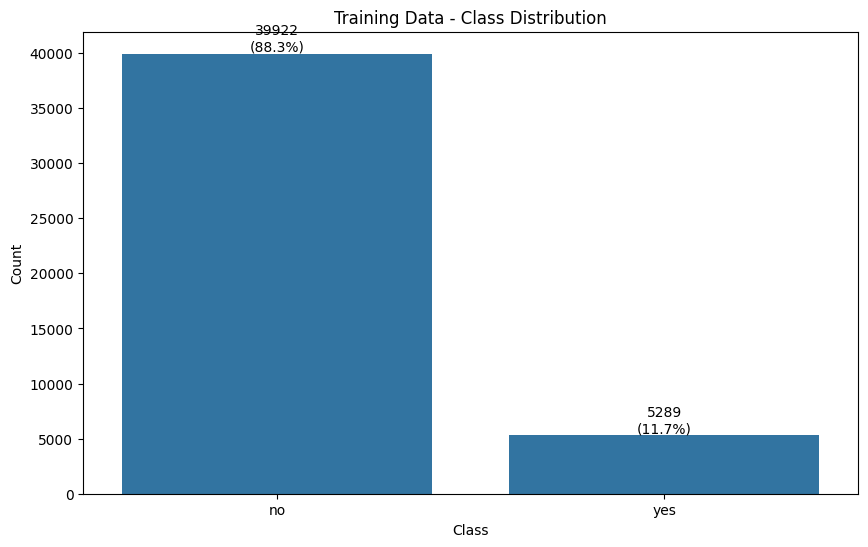

C:\Users\NeilXu\AppData\Local\Temp\ipykernel_23220\2794416254.py:33: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(i, v, f"{v}\n({class_percentages[i]:.1f}%)",



Test Data Imbalance:
     Count  Percentage
y                     
no    4000   88.476001
yes    521   11.523999
Imbalance Ratio: 7.68


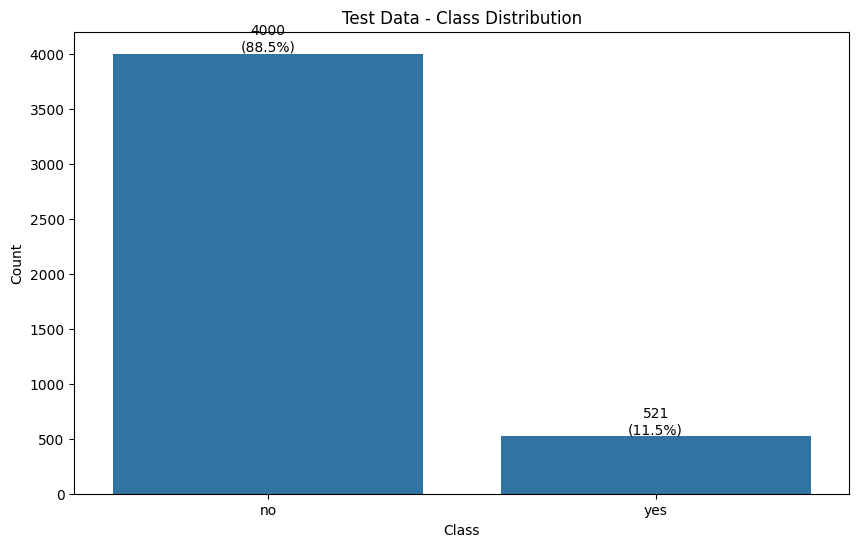


Comparing Train and Test Distributions:
        Train     Test
y                     
no   0.883015  0.88476
yes  0.116985  0.11524


C:\Users\NeilXu\AppData\Local\Temp\ipykernel_23220\2794416254.py:63: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  test_val = test_distribution[i]


<Figure size 1000x600 with 0 Axes>

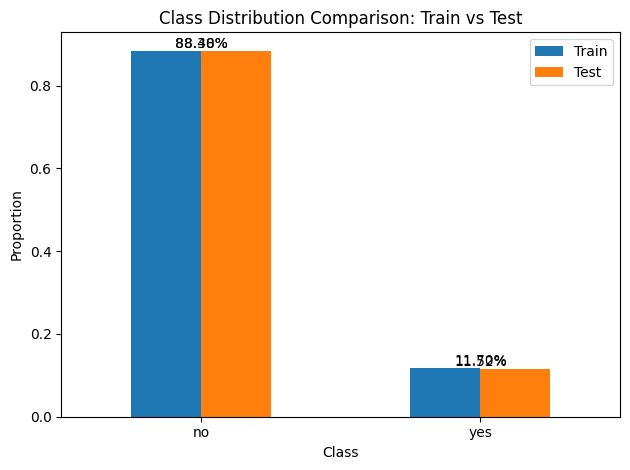

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

def check_imbalance(data, title):
    # Count the occurrences of each class
    class_counts = data['y'].value_counts()
    
    # Calculate percentages
    class_percentages = 100 * class_counts / len(data)
    
    # Create a DataFrame for easy printing
    imbalance_df = pd.DataFrame({
        'Count': class_counts,
        'Percentage': class_percentages
    })
    
    print(f"\n{title} Data Imbalance:")
    print(imbalance_df)
    
    # Calculate imbalance ratio
    imbalance_ratio = class_counts.max() / class_counts.min()
    print(f"Imbalance Ratio: {imbalance_ratio:.2f}")
    
    # Plotting
    plt.figure(figsize=(10, 6))
    sns.barplot(x=class_counts.index, y=class_counts.values)
    plt.title(f"{title} Data - Class Distribution")
    plt.xlabel('Class')
    plt.ylabel('Count')
    
    # Add value labels on the bars
    for i, v in enumerate(class_counts.values):
        plt.text(i, v, f"{v}\n({class_percentages[i]:.1f}%)", 
                 ha='center', va='bottom')
    
    plt.show()

# Check imbalance for train data
check_imbalance(train_data, "Training")

# Check imbalance for test data
check_imbalance(test_data, "Test")

# Compare distributions
print("\nComparing Train and Test Distributions:")
train_distribution = train_data['y'].value_counts(normalize=True)
test_distribution = test_data['y'].value_counts(normalize=True)
comparison_df = pd.DataFrame({
    'Train': train_distribution,
    'Test': test_distribution
})
print(comparison_df)

# Plotting comparison
plt.figure(figsize=(10, 6))
comparison_df.plot(kind='bar')
plt.title('Class Distribution Comparison: Train vs Test')
plt.xlabel('Class')
plt.ylabel('Proportion')
plt.legend(['Train', 'Test'])
plt.xticks(rotation=0)
for i, train_val in enumerate(train_distribution):
    test_val = test_distribution[i]
    plt.text(i, train_val, f'{train_val:.2%}', ha='center', va='bottom')
    plt.text(i, test_val, f'{test_val:.2%}', ha='center', va='bottom')
plt.tight_layout()
plt.show()

    This dataset exhibits a significant imbalance. We need to consider this factor when conducting further testing and modelling.

3. Check missing values

In [6]:
# Check for missing values in train_data and test_data
missing_values_train = train_data.isnull().sum()
print(missing_values_train)

missing_value_test = test_data.isnull().sum()
print(missing_value_test)

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64
age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64


In [7]:
train_data.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


4. Explore Categorical Features

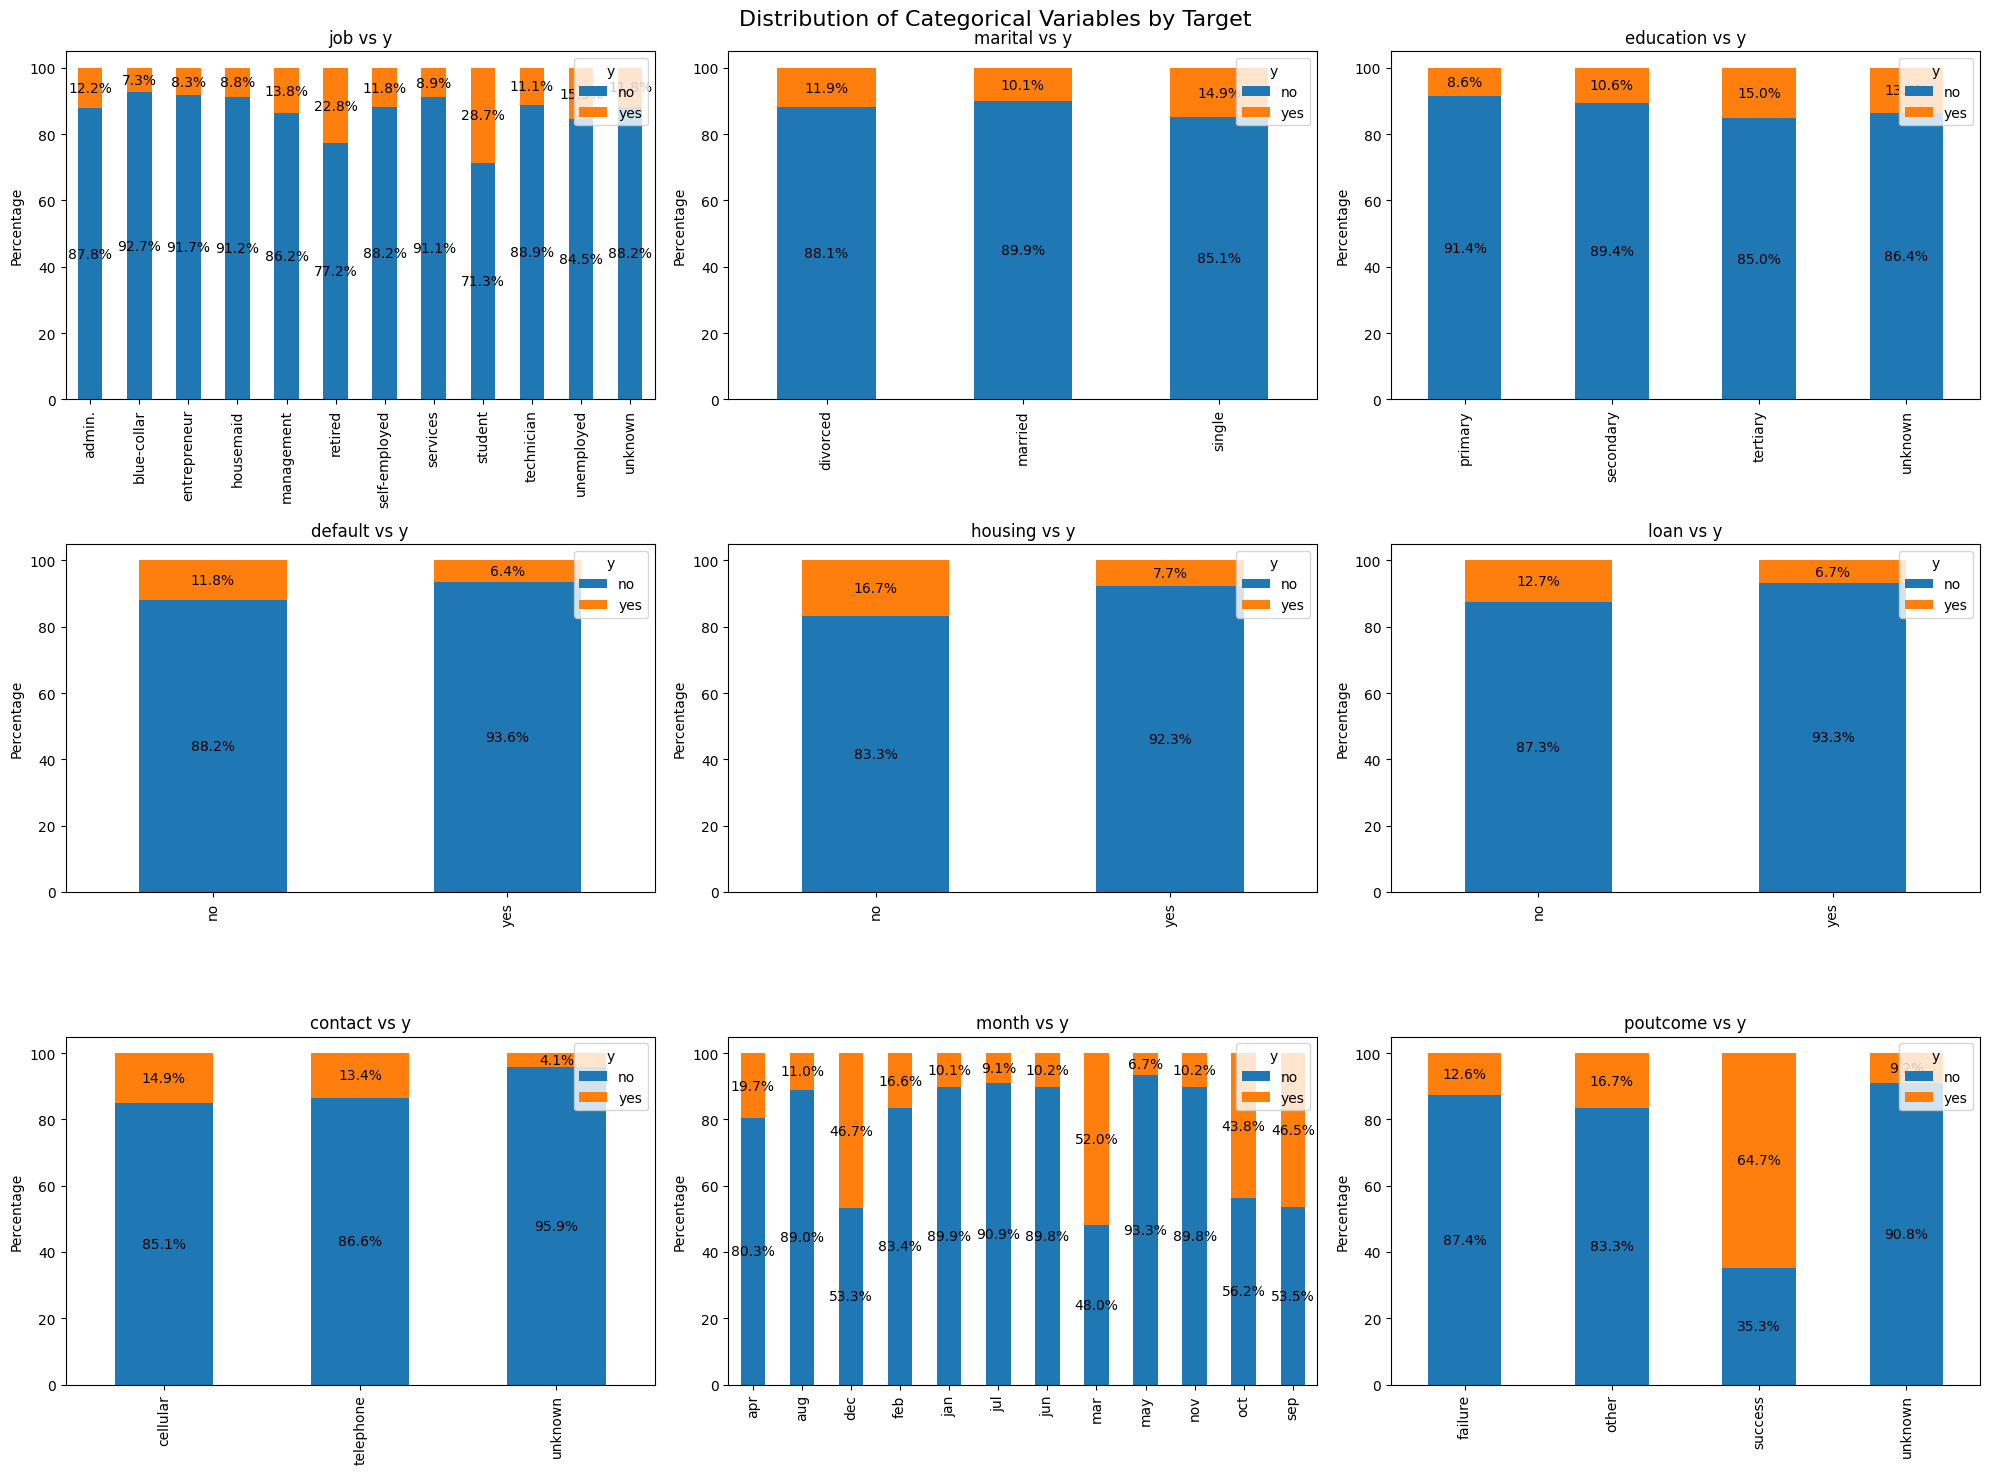

In [8]:
# Identify categorical columns
categorical_cols = train_data.select_dtypes(include=['object']).columns.tolist()
categorical_cols.remove('y')  # Remove target variable from the list

# Set up the plot
n_cols = 3
n_rows = (len(categorical_cols) - 1) // n_cols + 1
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 5*n_rows))
fig.suptitle('Distribution of Categorical Variables by Target', fontsize=16)

# Flatten axes array for easy indexing
axes = axes.flatten()

# Create histograms
for i, col in enumerate(categorical_cols):
    ax = axes[i]
    
    # Calculate percentage distributions
    pct_data = train_data.groupby(col)['y'].value_counts(normalize=True).unstack()
    pct_data = pct_data.mul(100)
    
    # Plot stacked bar chart
    pct_data.plot(kind='bar', stacked=True, ax=ax)
    
    ax.set_title(f'{col} vs y')
    ax.set_xlabel('')
    ax.set_ylabel('Percentage')
    ax.legend(title='y', loc='upper right')
    
    # Add percentage labels
    for c in ax.containers:
        ax.bar_label(c, fmt='%.1f%%', label_type='center')

# Remove any unused subplots
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

    Based on the histograms generated, we observe that categorical features such as job, marital, education, default, housing, loan, month, and 'poutcome' display noticable variations in their relationships with the target variable 'y'. 
    We will further examine the statistical significance of those variations.  

In [9]:
# Chi-Square Test
from scipy.stats import chi2_contingency

# List of selected categorical features
selected_features = ['job', 'education', 'default', 'housing', 'loan', 'month', 'poutcome']

# Function to perform chi-square test
def chi_square_test(data, feature, target):
    contingency_table = pd.crosstab(data[feature], data[target])
    chi2, p_value, dof, expected = chi2_contingency(contingency_table)
    return chi2, p_value

# Perform chi-square tests and store results
results = []
for feature in selected_features:
    chi2, p_value = chi_square_test(train_data, feature, 'y')
    results.append({'Feature': feature, 'Chi-Square': chi2, 'P-value': p_value})

# Convert results to DataFrame and sort by chi-square value
results_df = pd.DataFrame(results).sort_values('Chi-Square', ascending=False)

# Print results
print("Chi-Square Test Results:")
print(results_df.to_string(index=False))

Chi-Square Test Results:
  Feature  Chi-Square       P-value
 poutcome 4391.506589  0.000000e+00
    month 3061.838938  0.000000e+00
  housing  874.822449 2.918798e-192
      job  836.105488 3.337122e-172
education  238.923506  1.626656e-51
     loan  209.616980  1.665061e-47
  default   22.202250  2.453861e-06


    
    Based on the chi-square test results, all selected categorical features show a statitically significant difference when compared with 'y'. However, to control the computational complexity within a reasonable level, only the categorical features ‘poutcome’, ‘education’, and ‘housing’ are chosen for the models.

5. Explore Numerical Features

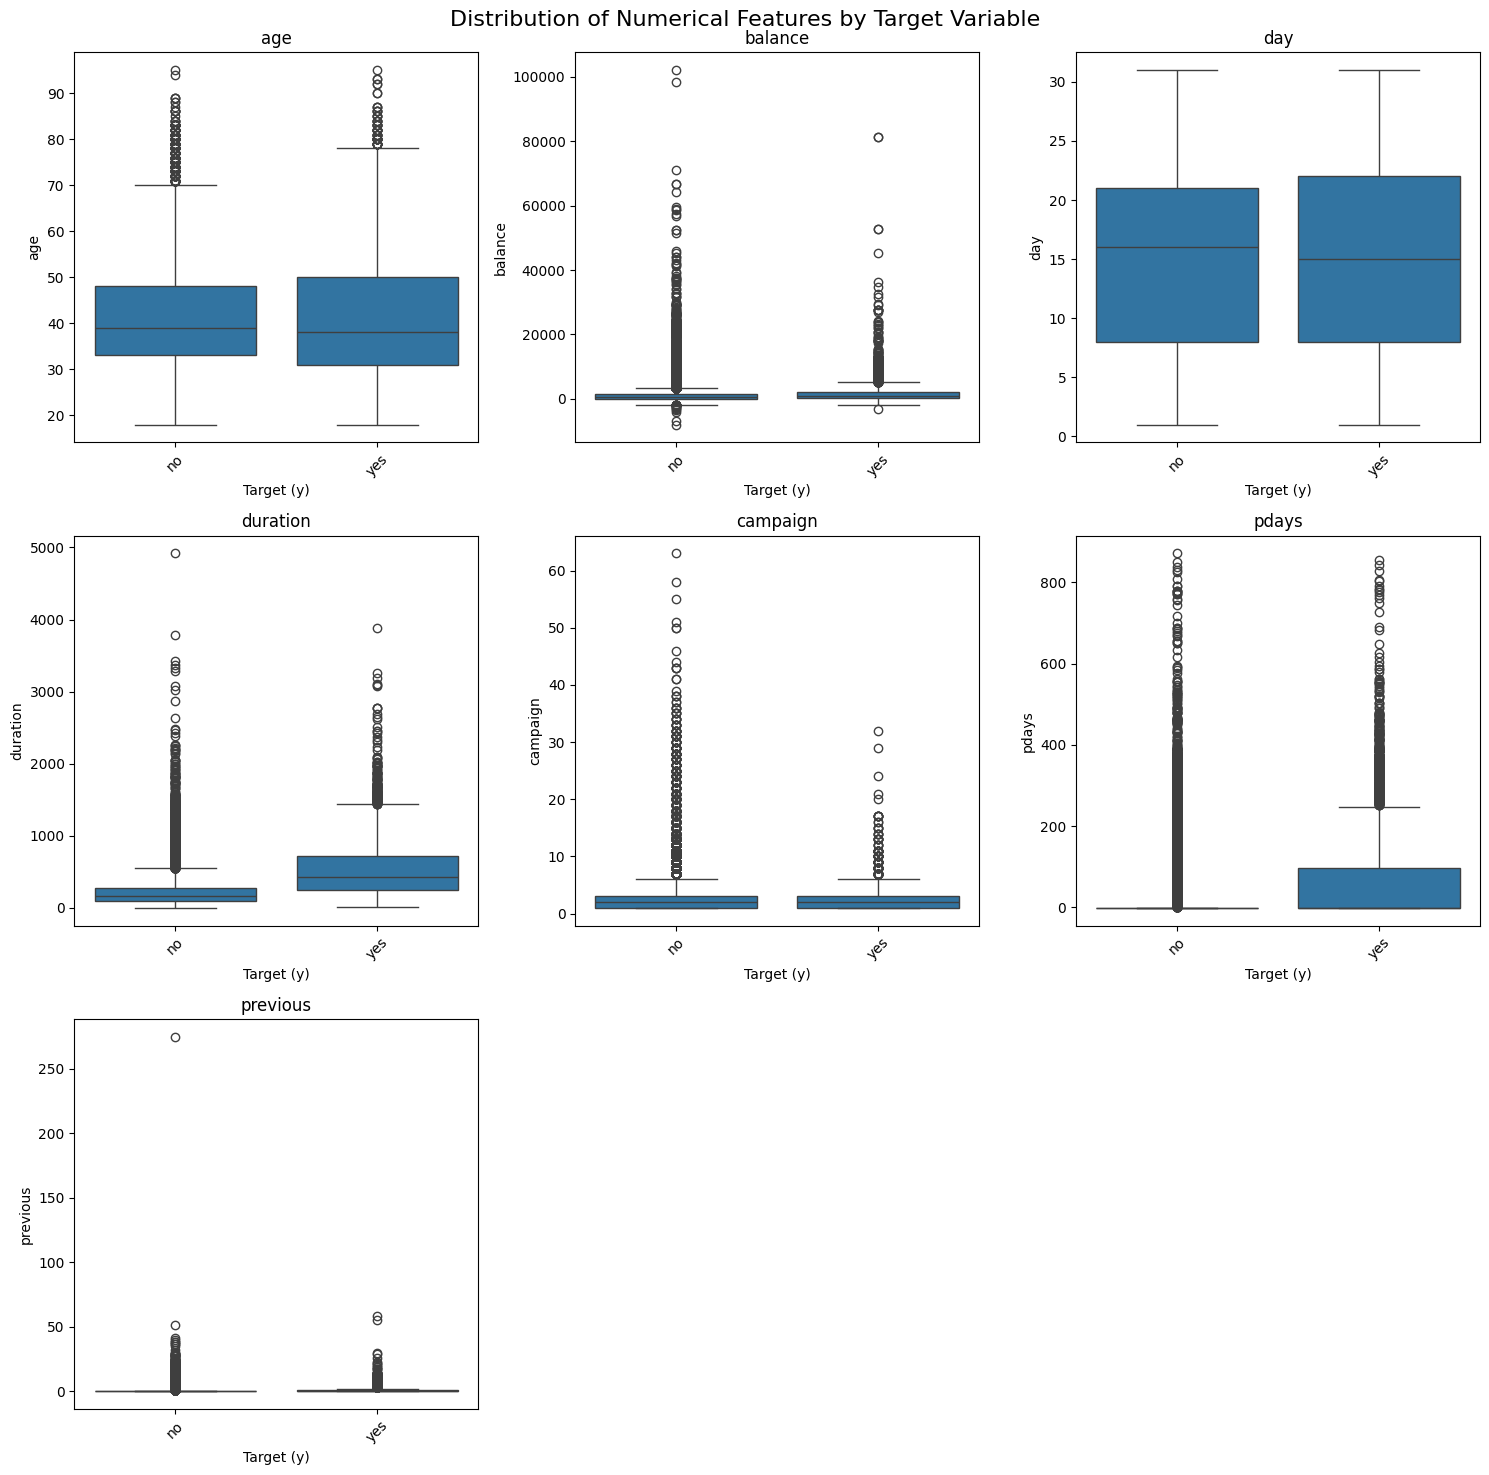


Summary Statistics for Numerical Features:

age:
       count       mean        std   min   25%   50%   75%   max
y                                                               
no   39922.0  40.838986  10.172662  18.0  33.0  39.0  48.0  95.0
yes   5289.0  41.670070  13.497781  18.0  31.0  38.0  50.0  95.0

balance:
       count         mean          std     min    25%    50%     75%       max
y                                                                             
no   39922.0  1303.714969  2974.195473 -8019.0   58.0  417.0  1345.0  102127.0
yes   5289.0  1804.267915  3501.104777 -3058.0  210.0  733.0  2159.0   81204.0

day:
       count       mean       std  min  25%   50%   75%   max
y                                                            
no   39922.0  15.892290  8.294728  1.0  8.0  16.0  21.0  31.0
yes   5289.0  15.158253  8.501875  1.0  8.0  15.0  22.0  31.0

duration:
       count        mean         std  min    25%    50%    75%     max
y                           

In [10]:
# Boxplots for all numerical features
import numpy as np

# Select numerical features
numerical_features = train_data.select_dtypes(include=[np.number]).columns.tolist()

# Calculate the number of rows and columns for the subplot grid
n_features = len(numerical_features)
n_cols = 3
n_rows = (n_features - 1) // n_cols + 1

# Create subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(5*n_cols, 5*n_rows))
fig.suptitle('Distribution of Numerical Features by Target Variable', fontsize=16)

# Flatten the axes array for easy indexing
axes = axes.flatten()

# Create boxplots
for i, feature in enumerate(numerical_features):
    sns.boxplot(x='y', y=feature, data=train_data, ax=axes[i])
    axes[i].set_title(feature)
    axes[i].set_xlabel('Target (y)')
    axes[i].set_ylabel(feature)
    
    # Rotate x-axis labels if they're overlapping
    axes[i].tick_params(axis='x', rotation=45)

# Remove any unused subplots
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

# Print summary statistics
print("\nSummary Statistics for Numerical Features:")
for feature in numerical_features:
    print(f"\n{feature}:")
    print(train_data.groupby('y')[feature].describe())

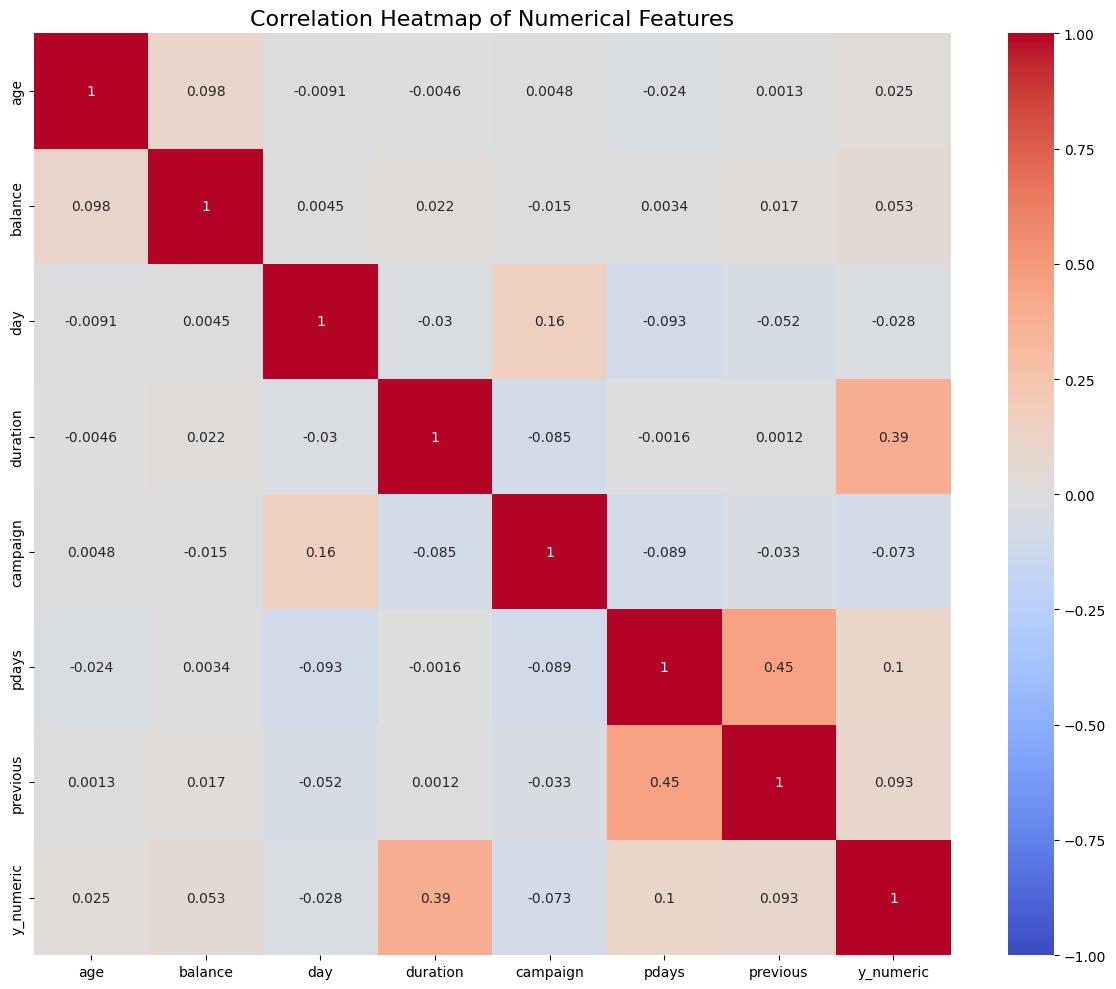


Correlations with target variable ('y'):
y_numeric    1.000000
duration     0.394521
pdays        0.103621
previous     0.093236
balance      0.052838
age          0.025155
day         -0.028348
campaign    -0.073172
Name: y_numeric, dtype: float64


In [11]:
# Heatmap for all numerical features

# Select numerical features
numerical_features = train_data.select_dtypes(include=[np.number]).columns.tolist()

# Ensure 'y' is included in the correlation matrix
if 'y' not in numerical_features:
    # Convert 'y' to numeric (assuming 'yes' = 1, 'no' = 0)
    train_data['y_numeric'] = (train_data['y'] == 'yes').astype(int)
    numerical_features.append('y_numeric')

# Calculate the correlation matrix
correlation_matrix = train_data[numerical_features].corr()

# Set up the matplotlib figure
plt.figure(figsize=(12, 10))

# Create a heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0)

# Set the title
plt.title('Correlation Heatmap of Numerical Features', fontsize=16)

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

# Print the correlation values with 'y' or 'y_numeric'
target_col = 'y_numeric' if 'y_numeric' in numerical_features else 'y'
correlations_with_target = correlation_matrix[target_col].sort_values(ascending=False)
print("\nCorrelations with target variable ('y'):")
print(correlations_with_target)

    Based on the heatmap generated, we observe that numerical features such as 'duration', 'pdays', 'campaign' and 'previous' display noticable correlations in their relationships with the target variable 'y'. 
    We will further examine the statistical significance of those correlations.

In [12]:
# T-Test
from scipy import stats

# List of selected numerical features
selected_features = ['duration', 'pdays', 'previous','campaign']

# Function to perform t-test
def perform_t_test(data, feature, target):
    group1 = data[data[target] == 'yes'][feature]
    group2 = data[data[target] == 'no'][feature]
    t_stat, p_value = stats.ttest_ind(group1, group2)
    return t_stat, p_value

# Perform t-tests and store results
results = []
for feature in selected_features:
    t_stat, p_value = perform_t_test(train_data, feature, 'y')
    mean_yes = train_data[train_data['y'] == 'yes'][feature].mean()
    mean_no = train_data[train_data['y'] == 'no'][feature].mean()
    results.append({
        'Feature': feature,
        'T-statistic': t_stat,
        'P-value': p_value,
        'Mean (y=yes)': mean_yes,
        'Mean (y=no)': mean_no
    })

# Convert results to DataFrame
results_df = pd.DataFrame(results)

# Print results
print("T-Test Results:")
print(results_df.to_string(index=False))

T-Test Results:
 Feature  T-statistic       P-value  Mean (y=yes)  Mean (y=no)
duration    91.289436  0.000000e+00    537.294574   221.182806
   pdays    22.151672 3.790553e-108     68.702968    36.421372
previous    19.910901  7.801830e-88      1.170354     0.502154
campaign   -15.599949  1.012347e-54      2.141047     2.846350


    Based on the t-test results, all selected numerical features show a statistically significant correlatoin when compared with 'y'.

6. Create the prepocessing pipeline

In [13]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
import sklearn

# Select features
numerical_features = ['duration', 'pdays', 'previous', 'campaign']
categorical_features = ['poutcome', 'education', 'housing']

# Separate features and target
X = train_data[numerical_features + categorical_features]
y = train_data['y']

# Check scikit-learn version and create appropriate OneHotEncoder
sklearn_version = sklearn.__version__
if sklearn_version >= '0.23.0':
    onehot = OneHotEncoder(drop='first', sparse_output=False)
else:
    onehot = OneHotEncoder(drop='first', sparse=False)

# Create preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', MinMaxScaler(), numerical_features),
        ('cat', onehot, categorical_features)
    ])

# Fit and transform the data
X_preprocessed = preprocessor.fit_transform(X)

# Get feature names after preprocessing
onehot_encoder = preprocessor.named_transformers_['cat']
if hasattr(onehot_encoder, 'get_feature_names_out'):
    cat_feature_names = onehot_encoder.get_feature_names_out(categorical_features)
else:
    cat_feature_names = onehot_encoder.get_feature_names(categorical_features)
feature_names = numerical_features + list(cat_feature_names)

# Create a new dataframe with preprocessed data
X_preprocessed_df = pd.DataFrame(X_preprocessed, columns=feature_names)

# Display info about the preprocessed data
print("Shape of preprocessed data:", X_preprocessed_df.shape)
print("\nFirst few rows of preprocessed data:")
print(X_preprocessed_df.head())

print("\nSummary statistics of preprocessed data:")
print(X_preprocessed_df.describe())

# Print feature names for later use
print("\nFeature names for model input:")
print(feature_names)

# Prepare final dataset with preprocessed features and target
final_train_data = X_preprocessed_df.copy()
final_train_data['target'] = y

print("\nFinal dataset shape:", final_train_data.shape)
print("\nFirst few rows of final dataset:")
print(final_train_data.head())

Shape of preprocessed data: (45211, 11)

First few rows of preprocessed data:
   duration  pdays  previous  campaign  poutcome_other  poutcome_success  \
0  0.053070    0.0       0.0       0.0             0.0               0.0   
1  0.030704    0.0       0.0       0.0             0.0               0.0   
2  0.015453    0.0       0.0       0.0             0.0               0.0   
3  0.018707    0.0       0.0       0.0             0.0               0.0   
4  0.040260    0.0       0.0       0.0             0.0               0.0   

   poutcome_unknown  education_secondary  education_tertiary  \
0               1.0                  0.0                 1.0   
1               1.0                  1.0                 0.0   
2               1.0                  1.0                 0.0   
3               1.0                  0.0                 0.0   
4               1.0                  0.0                 0.0   

   education_unknown  housing_yes  
0                0.0          1.0  
1       

# Part 2: Build Baseline Models

1. Cross-validation for baseline models

In [14]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score
from sklearn.preprocessing import LabelEncoder

# Separate features and target
X = final_train_data.drop('target', axis=1)
y = final_train_data['target']

# Encode target variable
le = LabelEncoder()
y = le.fit_transform(y)

# Perform train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize models
logreg = LogisticRegression(random_state=42)
knn = KNeighborsClassifier()

# Perform cross-validation
cv = 5
logreg_scores = cross_val_score(logreg, X_train, y_train, cv=cv, scoring='f1')
knn_scores = cross_val_score(knn, X_train, y_train, cv=cv, scoring='f1')

# Print cross-validation results
print("Logistic Regression - Cross-validation F1 scores:", logreg_scores)
print("Logistic Regression - Mean F1 score:", logreg_scores.mean())
print("Logistic Regression - Standard deviation:", logreg_scores.std())
print("\nKNN - Cross-validation F1 scores:", knn_scores)
print("KNN - Mean F1 score:", knn_scores.mean())
print("KNN - Standard deviation:", knn_scores.std())

# Train models on the entire training set
logreg.fit(X_train, y_train)
knn.fit(X_train, y_train)

# Make predictions on the test set
logreg_pred = logreg.predict(X_test)
knn_pred = knn.predict(X_test)

# Calculate F1 scores on the test set
logreg_f1 = f1_score(y_test, logreg_pred)
knn_f1 = f1_score(y_test, knn_pred)

print("\nTest Set Results:")
print("Logistic Regression - F1 score:", logreg_f1)
print("KNN - F1 score:", knn_f1)

# Compare models
if logreg_f1 > knn_f1:
    print("\nLogistic Regression performs better on the test set.")
elif knn_f1 > logreg_f1:
    print("\nKNN performs better on the test set.")
else:
    print("\nBoth models perform equally on the test set.")

Logistic Regression - Cross-validation F1 scores: [0.382134   0.39799331 0.41396104 0.39495798 0.39202658]
Logistic Regression - Mean F1 score: 0.39621458126028325
Logistic Regression - Standard deviation: 0.010348738650923433

KNN - Cross-validation F1 scores: [0.4301231  0.44827586 0.4543554  0.41636231 0.43523316]
KNN - Mean F1 score: 0.4368699661690534
KNN - Standard deviation: 0.013450637615440235

Test Set Results:
Logistic Regression - F1 score: 0.3987220447284345
KNN - F1 score: 0.4352557127312296

KNN performs better on the test set.


2. LogReg

Best parameters: {'C': 10, 'penalty': 'l1', 'solver': 'liblinear'}
Best cross-validation score: 0.41497809426299953

Performance Scores:
Accuracy: 0.8961
Precision: 0.6438
Recall: 0.3098
F1 Score: 0.4183
ROC AUC Score: 0.8753


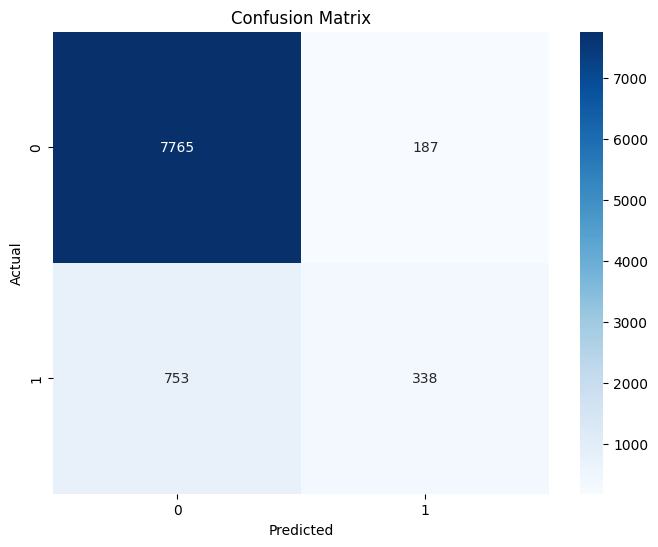


Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.98      0.94      7952
           1       0.64      0.31      0.42      1091

    accuracy                           0.90      9043
   macro avg       0.78      0.64      0.68      9043
weighted avg       0.88      0.90      0.88      9043



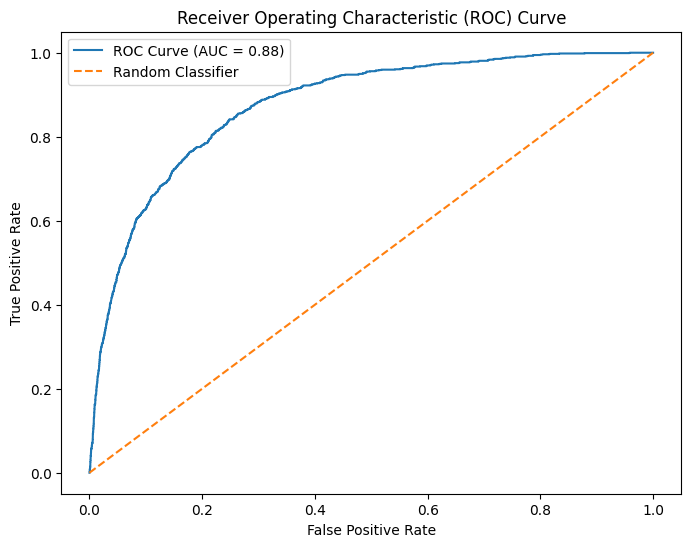


Timing Information:
Total time to run grid search: 7.65 seconds
Time per fit: 0.32 seconds

Top 10 most important features:
                feature  importance
0              duration   19.465367
3              campaign    6.666715
5      poutcome_success    2.275935
2              previous    1.957443
10          housing_yes    1.053229
6      poutcome_unknown    0.606863
8    education_tertiary    0.545892
9     education_unknown    0.296779
4        poutcome_other    0.282192
7   education_secondary    0.254939


In [15]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import confusion_matrix, classification_report, roc_curve
import time

# Define the parameter grid
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga']
}

# Create the grid search object
grid_search = GridSearchCV(
    LogisticRegression(random_state=42),
    param_grid,
    cv=5,
    scoring='f1',
    n_jobs=-1
)

# Perform grid search
start_time = time.time()
grid_search.fit(X_train, y_train)
end_time = time.time()

# Print the best parameters and score
print("Best parameters:", grid_search.best_params_)
print("Best cross-validation score:", grid_search.best_score_)

# Get the best model
best_logreg = grid_search.best_estimator_

# Make predictions on the test set
y_pred = best_logreg.predict(X_test)
y_pred_proba = best_logreg.predict_proba(X_test)[:, 1]

# Calculate performance metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)

print("\nPerformance Scores:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"ROC AUC Score: {roc_auc:.4f}")

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', label='Random Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

# Timing Information
total_time = end_time - start_time
n_fits = len(grid_search.cv_results_['mean_fit_time'])
time_per_fit = total_time / n_fits

print("\nTiming Information:")
print(f"Total time to run grid search: {total_time:.2f} seconds")
print(f"Time per fit: {time_per_fit:.2f} seconds")

# Feature Importance
feature_importance = pd.DataFrame({
    'feature': X_train.columns,
    'importance': abs(best_logreg.coef_[0])
})
feature_importance = feature_importance.sort_values('importance', ascending=False)

print("\nTop 10 most important features:")
print(feature_importance.head(10))

Optimal Threshold: 0.1975
Optimal F1 Score: 0.5465

Classification Report with Optimal Threshold:
              precision    recall  f1-score   support

           0       0.94      0.92      0.93      7952
           1       0.50      0.61      0.55      1091

    accuracy                           0.88      9043
   macro avg       0.72      0.76      0.74      9043
weighted avg       0.89      0.88      0.88      9043



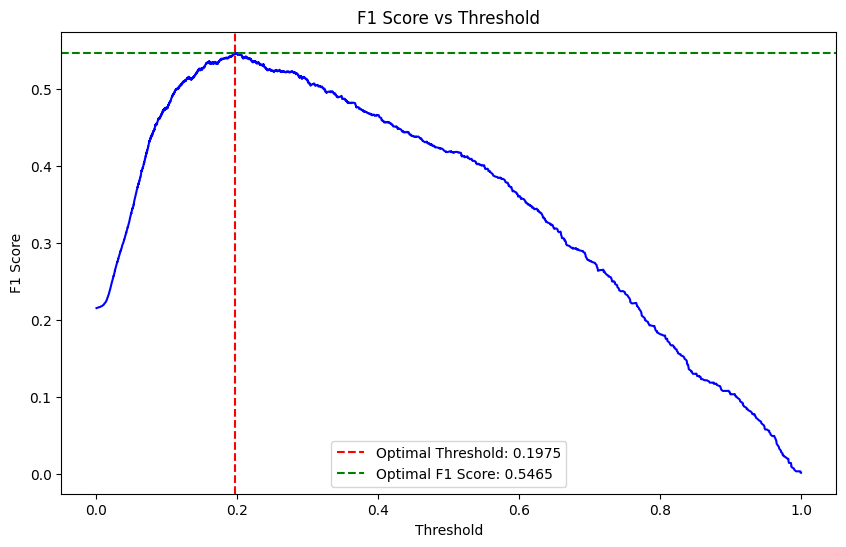

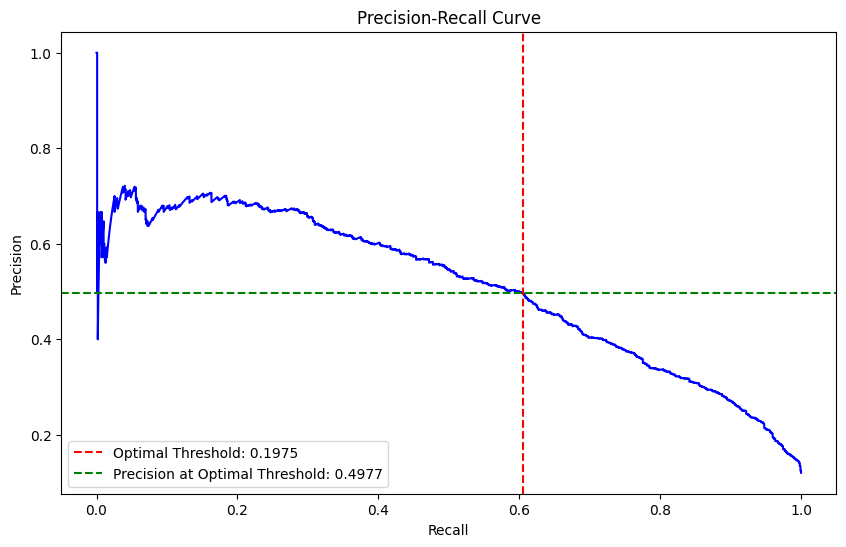


Default Threshold (0.5) F1 Score: 0.4183
Improvement in F1 Score: 0.1282

Metrics at threshold 0.5:
Accuracy: 0.8961
Precision: 0.6438
Recall: 0.3098
F1 Score: 0.4183
ROC AUC Score: 0.8753

Metrics at threshold 0.1974608818190591:
Accuracy: 0.8787
Precision: 0.4977
Recall: 0.6059
F1 Score: 0.5465
ROC AUC Score: 0.8753


In [16]:
from sklearn.metrics import f1_score, precision_recall_curve

# Get predicted probabilities
y_pred_proba = best_logreg.predict_proba(X_test)[:, 1]

# Calculate precision, recall, and thresholds
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_proba)

# Calculate F1 score for each threshold
f1_scores = 2 * (precision * recall) / (precision + recall)

# Find the index of the maximum F1 score
optimal_idx = np.argmax(f1_scores)
optimal_threshold = thresholds[optimal_idx]
optimal_f1_score = f1_scores[optimal_idx]

print(f"Optimal Threshold: {optimal_threshold:.4f}")
print(f"Optimal F1 Score: {optimal_f1_score:.4f}")

# Apply the optimal threshold to get predictions
y_pred_optimal = (y_pred_proba >= optimal_threshold).astype(int)

# Calculate and print the classification report with the optimal threshold
from sklearn.metrics import classification_report
print("\nClassification Report with Optimal Threshold:")
print(classification_report(y_test, y_pred_optimal))

# Plot F1 score vs threshold
plt.figure(figsize=(10, 6))
plt.plot(thresholds, f1_scores[:-1], 'b-')
plt.xlabel('Threshold')
plt.ylabel('F1 Score')
plt.title('F1 Score vs Threshold')
plt.axvline(x=optimal_threshold, color='r', linestyle='--', label=f'Optimal Threshold: {optimal_threshold:.4f}')
plt.axhline(y=optimal_f1_score, color='g', linestyle='--', label=f'Optimal F1 Score: {optimal_f1_score:.4f}')
plt.legend()
plt.show()

# Plot Precision-Recall curve
plt.figure(figsize=(10, 6))
plt.plot(recall, precision, 'b-')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.axvline(x=recall[optimal_idx], color='r', linestyle='--', label=f'Optimal Threshold: {optimal_threshold:.4f}')
plt.axhline(y=precision[optimal_idx], color='g', linestyle='--', label=f'Precision at Optimal Threshold: {precision[optimal_idx]:.4f}')
plt.legend()
plt.show()

# Compare with default threshold (0.5)
y_pred_default = (y_pred_proba >= 0.5).astype(int)
default_f1_score = f1_score(y_test, y_pred_default)

print(f"\nDefault Threshold (0.5) F1 Score: {default_f1_score:.4f}")
print(f"Improvement in F1 Score: {optimal_f1_score - default_f1_score:.4f}")

# Calculate and print additional metrics for comparison
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score

def print_metrics(y_true, y_pred, threshold):
    print(f"\nMetrics at threshold {threshold}:")
    print(f"Accuracy: {accuracy_score(y_true, y_pred):.4f}")
    print(f"Precision: {precision_score(y_true, y_pred):.4f}")
    print(f"Recall: {recall_score(y_true, y_pred):.4f}")
    print(f"F1 Score: {f1_score(y_true, y_pred):.4f}")
    print(f"ROC AUC Score: {roc_auc_score(y_true, y_pred_proba):.4f}")

print_metrics(y_test, y_pred_default, 0.5)
print_metrics(y_test, y_pred_optimal, optimal_threshold)

3. KNN

Best parameters: {'metric': 'euclidean', 'n_neighbors': 11, 'weights': 'uniform'}
Best cross-validation score: 0.44255382211426497

Performance Scores:
Accuracy: 0.8905
Precision: 0.5790
Recall: 0.3391
F1 Score: 0.4277
ROC AUC Score: 0.8377


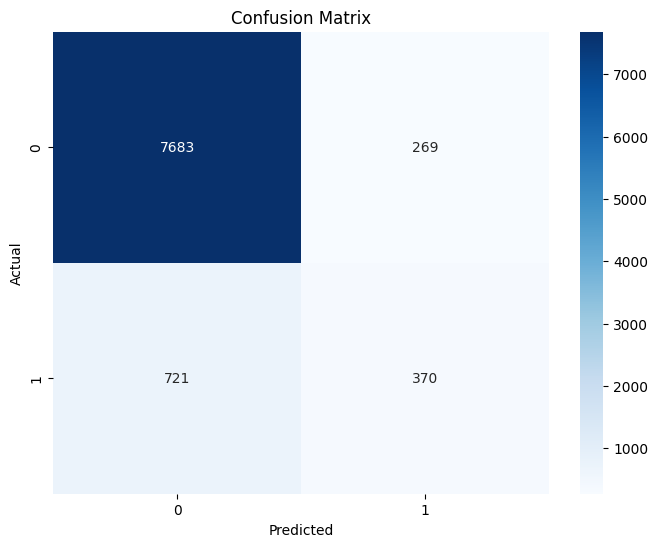


Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.97      0.94      7952
           1       0.58      0.34      0.43      1091

    accuracy                           0.89      9043
   macro avg       0.75      0.65      0.68      9043
weighted avg       0.87      0.89      0.88      9043



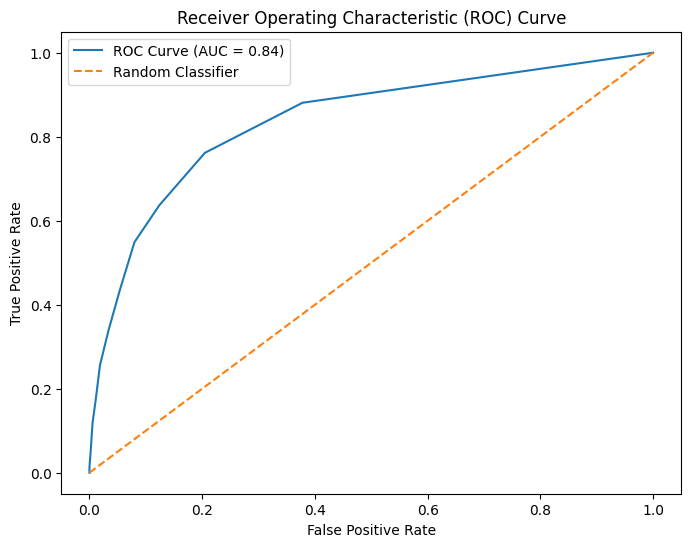


Timing Information:
Total time to run grid search: 19.34 seconds
Time per fit: 0.69 seconds

Top 10 potentially important features (based on feature scaling):
                                 feature  importance
education_secondary  education_secondary    0.499737
housing_yes                  housing_yes    0.496774
education_tertiary    education_tertiary    0.454403
poutcome_unknown        poutcome_unknown    0.386423
poutcome_other            poutcome_other    0.199191
education_unknown      education_unknown    0.198297
poutcome_success        poutcome_success    0.179821
pdays                              pdays    0.114801
duration                        duration    0.052233
campaign                        campaign    0.050325


In [17]:
import pandas as pd
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import confusion_matrix, classification_report, roc_curve

# Define the parameter grid
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11, 13, 15],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

# Create the grid search object
grid_search = GridSearchCV(
    KNeighborsClassifier(),
    param_grid,
    cv=5,
    scoring='f1',
    n_jobs=-1
)

# Perform grid search
start_time = time.time()
grid_search.fit(X_train, y_train)
end_time = time.time()

# Print the best parameters and score
print("Best parameters:", grid_search.best_params_)
print("Best cross-validation score:", grid_search.best_score_)

# Get the best model
best_knn = grid_search.best_estimator_

# Make predictions on the test set
y_pred = best_knn.predict(X_test)
y_pred_proba = best_knn.predict_proba(X_test)[:, 1]

# Calculate performance metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)

print("\nPerformance Scores:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"ROC AUC Score: {roc_auc:.4f}")

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', label='Random Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

# Timing Information
total_time = end_time - start_time
n_fits = len(grid_search.cv_results_['mean_fit_time'])
time_per_fit = total_time / n_fits

print("\nTiming Information:")
print(f"Total time to run grid search: {total_time:.2f} seconds")
print(f"Time per fit: {time_per_fit:.2f} seconds")

# Feature Importance (for KNN, we'll use a simple method based on feature scaling)
feature_importance = pd.DataFrame({
    'feature': X_train.columns,
    'importance': np.std(X_train, axis=0)  # Features with higher variance might be more important
})
feature_importance = feature_importance.sort_values('importance', ascending=False)

print("\nTop 10 potentially important features (based on feature scaling):")
print(feature_importance.head(10))

Optimal Threshold: 0.3636
Optimal F1 Score: 0.5153

Classification Report with Optimal Threshold:
              precision    recall  f1-score   support

           0       0.94      0.92      0.93      7952
           1       0.49      0.55      0.52      1091

    accuracy                           0.88      9043
   macro avg       0.71      0.73      0.72      9043
weighted avg       0.88      0.88      0.88      9043



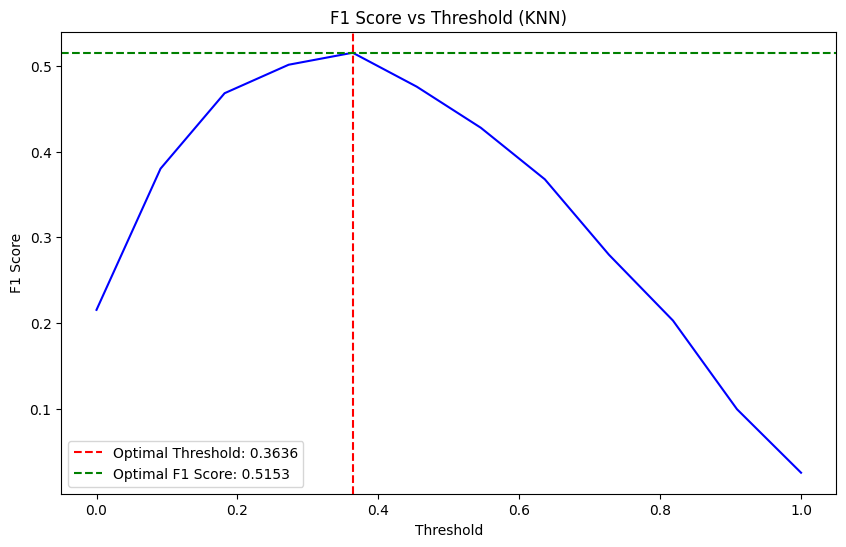

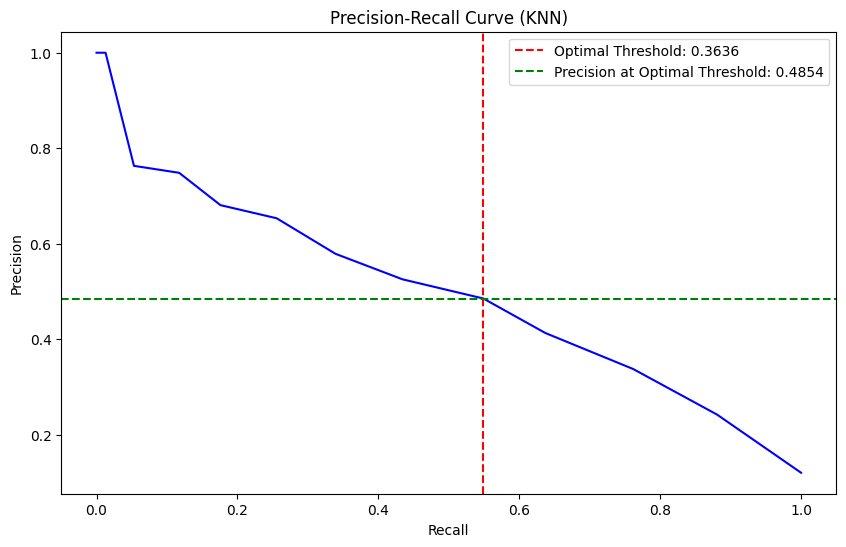


Default Threshold (0.5) F1 Score: 0.4277
Improvement in F1 Score: 0.0875

Metrics at threshold 0.5:
Accuracy: 0.8905
Precision: 0.5790
Recall: 0.3391
F1 Score: 0.4277
ROC AUC Score: 0.8377

Metrics at threshold 0.36363636363636365:
Accuracy: 0.8754
Precision: 0.4854
Recall: 0.5490
F1 Score: 0.5153
ROC AUC Score: 0.8377

Unable to visualize decision boundaries: more than 2 features present.


In [18]:
# Get predicted probabilities
y_pred_proba = best_knn.predict_proba(X_test)[:, 1]

# Calculate precision, recall, and thresholds
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_proba)

# Calculate F1 score for each threshold
f1_scores = 2 * (precision * recall) / (precision + recall)

# Find the index of the maximum F1 score
optimal_idx = np.argmax(f1_scores)
optimal_threshold = thresholds[optimal_idx]
optimal_f1_score = f1_scores[optimal_idx]

print(f"Optimal Threshold: {optimal_threshold:.4f}")
print(f"Optimal F1 Score: {optimal_f1_score:.4f}")

# Apply the optimal threshold to get predictions
y_pred_optimal = (y_pred_proba >= optimal_threshold).astype(int)

# Calculate and print the classification report with the optimal threshold
print("\nClassification Report with Optimal Threshold:")
print(classification_report(y_test, y_pred_optimal))

# Plot F1 score vs threshold
plt.figure(figsize=(10, 6))
plt.plot(thresholds, f1_scores[:-1], 'b-')
plt.xlabel('Threshold')
plt.ylabel('F1 Score')
plt.title('F1 Score vs Threshold (KNN)')
plt.axvline(x=optimal_threshold, color='r', linestyle='--', label=f'Optimal Threshold: {optimal_threshold:.4f}')
plt.axhline(y=optimal_f1_score, color='g', linestyle='--', label=f'Optimal F1 Score: {optimal_f1_score:.4f}')
plt.legend()
plt.show()

# Plot Precision-Recall curve
plt.figure(figsize=(10, 6))
plt.plot(recall, precision, 'b-')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve (KNN)')
plt.axvline(x=recall[optimal_idx], color='r', linestyle='--', label=f'Optimal Threshold: {optimal_threshold:.4f}')
plt.axhline(y=precision[optimal_idx], color='g', linestyle='--', label=f'Precision at Optimal Threshold: {precision[optimal_idx]:.4f}')
plt.legend()
plt.show()

# Compare with default threshold (0.5)
y_pred_default = (y_pred_proba >= 0.5).astype(int)
default_f1_score = f1_score(y_test, y_pred_default)

print(f"\nDefault Threshold (0.5) F1 Score: {default_f1_score:.4f}")
print(f"Improvement in F1 Score: {optimal_f1_score - default_f1_score:.4f}")

# Function to calculate and print metrics
def print_metrics(y_true, y_pred, threshold):
    print(f"\nMetrics at threshold {threshold}:")
    print(f"Accuracy: {accuracy_score(y_true, y_pred):.4f}")
    print(f"Precision: {precision_score(y_true, y_pred):.4f}")
    print(f"Recall: {recall_score(y_true, y_pred):.4f}")
    print(f"F1 Score: {f1_score(y_true, y_pred):.4f}")
    print(f"ROC AUC Score: {roc_auc_score(y_true, y_pred_proba):.4f}")

# Print metrics for default and optimal thresholds
print_metrics(y_test, y_pred_default, 0.5)
print_metrics(y_test, y_pred_optimal, optimal_threshold)

# Visualize decision boundaries (if possible)
if X_test.shape[1] == 2:  # Only if we have 2 features
    plt.figure(figsize=(10, 8))
    x_min, x_max = X_test[:, 0].min() - 1, X_test[:, 0].max() + 1
    y_min, y_max = X_test[:, 1].min() - 1, X_test[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                         np.arange(y_min, y_max, 0.1))
    Z = best_knn.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
    Z = Z.reshape(xx.shape)
    
    plt.contourf(xx, yy, Z, alpha=0.4)
    scatter = plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, alpha=0.8)
    plt.colorbar(scatter)
    plt.title("KNN Decision Boundary")
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.show()
else:
    print("\nUnable to visualize decision boundaries: more than 2 features present.")

# Part 3: Ensemble Modelling

1. Cross-Validation for Emsemble Models

c:\Users\NeilXu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\NeilXu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\NeilXu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\NeilXu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default)

Cross-validation F1 Scores:
Random Forest: Mean = 0.4349, Std = 0.0126
AdaBoost: Mean = 0.4330, Std = 0.0087
Bagging: Mean = 0.4125, Std = 0.0181
Voting: Mean = 0.4461, Std = 0.0126


c:\Users\NeilXu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\NeilXu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(



Test Set F1 Scores:
Random Forest: 0.4258
AdaBoost: 0.4176
Bagging: 0.4067
Voting: 0.4321


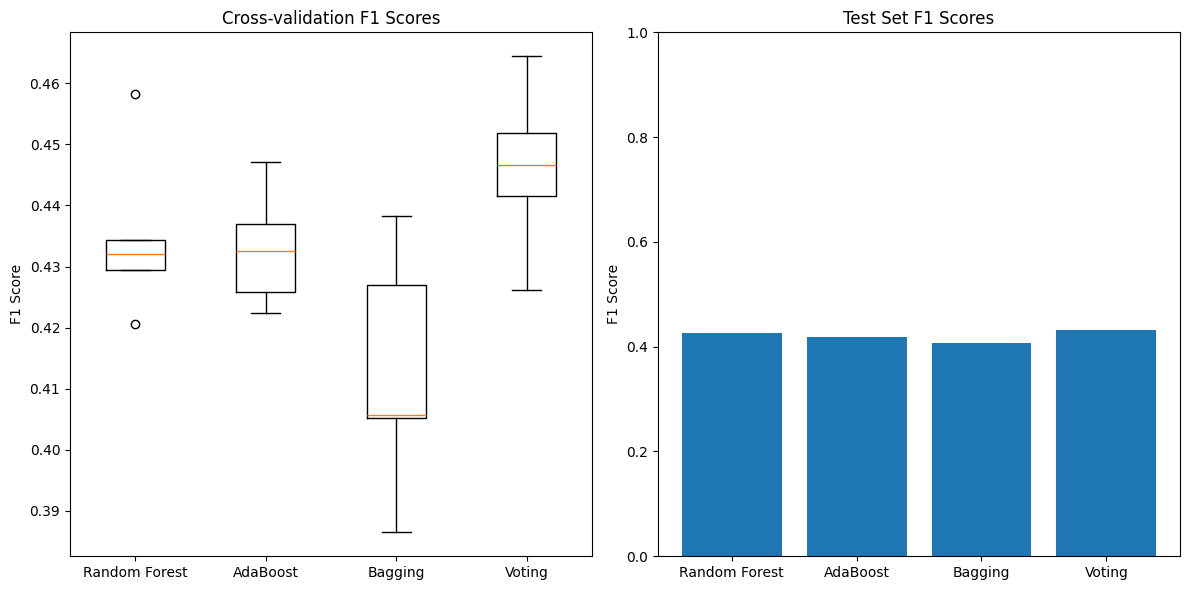


Best performing model: Voting

Voting Classifier does not have a straightforward feature importance measure.


In [19]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, BaggingClassifier, VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import __version__ as sklearn_version

# Initialize models
rf = RandomForestClassifier(random_state=42)
ada = AdaBoostClassifier(random_state=42)

# Check scikit-learn version for BaggingClassifier initialization
if sklearn_version >= '0.22':
    bag = BaggingClassifier(estimator=DecisionTreeClassifier(), random_state=42)
else:
    bag = BaggingClassifier(base_estimator=DecisionTreeClassifier(), random_state=42)

voting = VotingClassifier(estimators=[('rf', rf), ('ada', ada), ('bag', bag)], voting='soft')

models = [rf, ada, bag, voting]
model_names = ['Random Forest', 'AdaBoost', 'Bagging', 'Voting']

# Perform cross-validation
cv_scores = {}
for model, name in zip(models, model_names):
    scores = cross_val_score(model, X_train, y_train, cv=5, scoring='f1')
    cv_scores[name] = scores

# Print cross-validation results
print("Cross-validation F1 Scores:")
for name, scores in cv_scores.items():
    print(f"{name}: Mean = {np.mean(scores):.4f}, Std = {np.std(scores):.4f}")

# Train models on the entire training set and evaluate on test set
test_scores = {}
for model, name in zip(models, model_names):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    test_scores[name] = f1_score(y_test, y_pred)

print("\nTest Set F1 Scores:")
for name, score in test_scores.items():
    print(f"{name}: {score:.4f}")

# Visualize results
plt.figure(figsize=(12, 6))

# Plot cross-validation scores
plt.subplot(1, 2, 1)
plt.boxplot([cv_scores[name] for name in model_names], labels=model_names)
plt.title('Cross-validation F1 Scores')
plt.ylabel('F1 Score')

# Plot test set scores
plt.subplot(1, 2, 2)
plt.bar(model_names, [test_scores[name] for name in model_names])
plt.title('Test Set F1 Scores')
plt.ylabel('F1 Score')
plt.ylim(0, 1)

plt.tight_layout()
plt.show()

# Identify the best model based on test set performance
best_model_name = max(test_scores, key=test_scores.get)
best_model = models[model_names.index(best_model_name)]

print(f"\nBest performing model: {best_model_name}")

# Feature importance for the best model (if it's not Voting Classifier)
if best_model_name != 'Voting':
    if hasattr(best_model, 'feature_importances_'):
        feature_importance = pd.DataFrame({
            'feature': X_train.columns,
            'importance': best_model.feature_importances_
        }).sort_values('importance', ascending=False)

        print(f"\nTop 10 important features for {best_model_name}:")
        print(feature_importance.head(10))
    else:
        print(f"\n{best_model_name} does not have built-in feature importance.")
else:
    print("\nVoting Classifier does not have a straightforward feature importance measure.")

2. Random Forest

c:\Users\NeilXu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
21 fits failed out of a total of 60.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
12 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\NeilXu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\NeilXu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py", line 1467, in wrapper
    estimator._validate_params()
  File "c:\Users\NeilXu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\bas

Best parameters: {'n_estimators': 300, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 10, 'bootstrap': False}
Best cross-validation score: 0.45148120839634726

Performance Scores:
Accuracy: 0.8979
Precision: 0.6395
Recall: 0.3529
F1 Score: 0.4548
ROC AUC Score: 0.8829


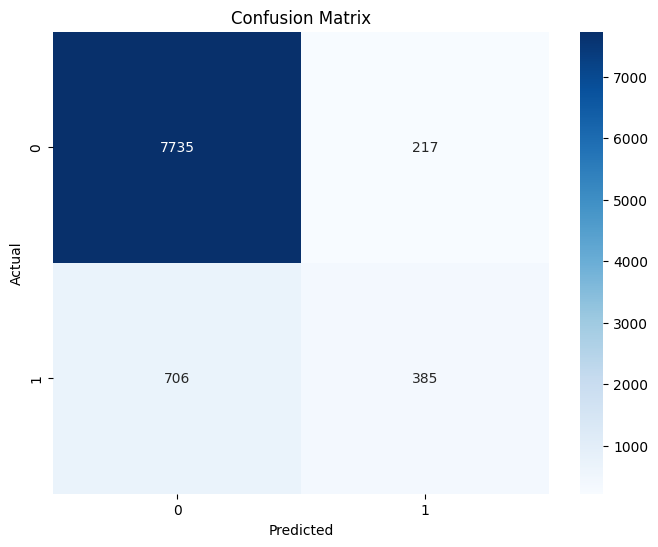


Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.97      0.94      7952
           1       0.64      0.35      0.45      1091

    accuracy                           0.90      9043
   macro avg       0.78      0.66      0.70      9043
weighted avg       0.88      0.90      0.88      9043



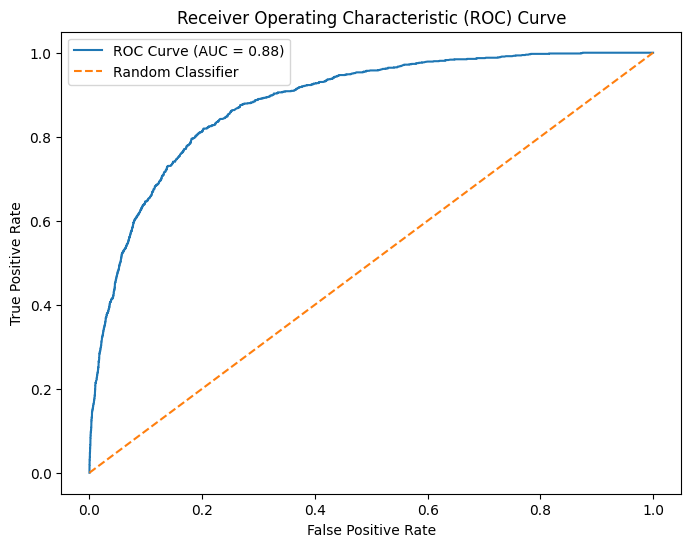


Timing Information:
Total time to run random search: 27.27 seconds
Time per iteration: 1.36 seconds

Top 10 most important features:
                feature  importance
0              duration    0.568437
5      poutcome_success    0.178668
1                 pdays    0.083980
10          housing_yes    0.064013
2              previous    0.035973
3              campaign    0.032810
6      poutcome_unknown    0.015390
8    education_tertiary    0.009231
7   education_secondary    0.004342
4        poutcome_other    0.004073


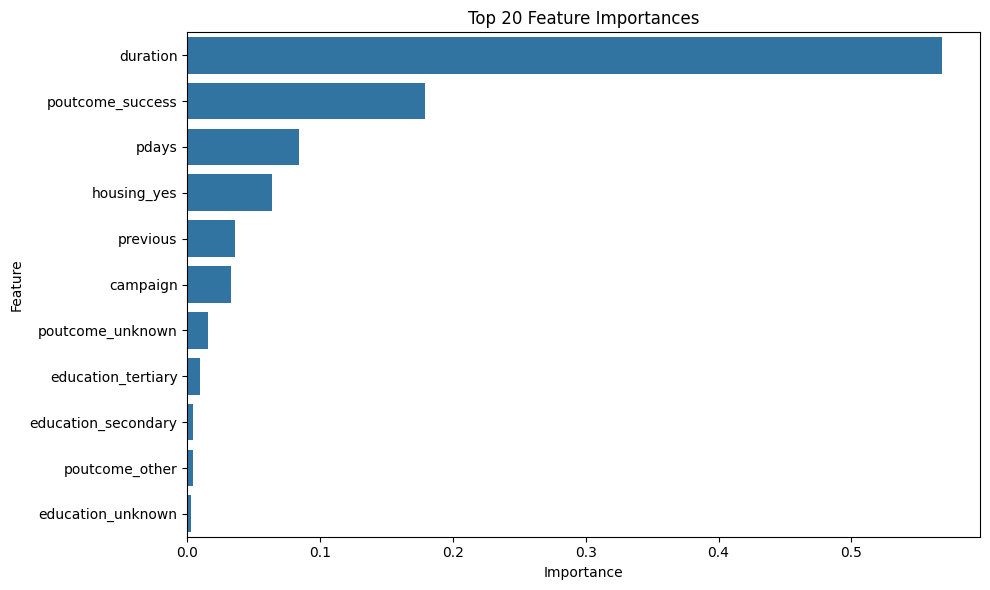

In [20]:
from sklearn.model_selection import RandomizedSearchCV

# Define a simplified parameter distribution for random search
param_dist = {
    'n_estimators': [100, 200, 300],
    'max_features': ['auto', 'sqrt'],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'bootstrap': [True, False]
}

# Create the random search object with fewer iterations
random_search = RandomizedSearchCV(
    RandomForestClassifier(random_state=42),
    param_distributions=param_dist,
    n_iter=20,  # Reduced number of iterations
    cv=3,  # Reduced number of cross-validation folds
    scoring='f1',
    n_jobs=-1,
    random_state=42
)

# Perform random search
start_time = time.time()
random_search.fit(X_train, y_train)
end_time = time.time()

# Print the best parameters and score
print("Best parameters:", random_search.best_params_)
print("Best cross-validation score:", random_search.best_score_)

# Get the best model
best_rf = random_search.best_estimator_

# Make predictions on the test set
y_pred = best_rf.predict(X_test)
y_pred_proba = best_rf.predict_proba(X_test)[:, 1]

# Calculate performance metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)

print("\nPerformance Scores:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"ROC AUC Score: {roc_auc:.4f}")

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', label='Random Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

# Timing Information
total_time = end_time - start_time
n_iter = random_search.n_iter
time_per_iter = total_time / n_iter

print("\nTiming Information:")
print(f"Total time to run random search: {total_time:.2f} seconds")
print(f"Time per iteration: {time_per_iter:.2f} seconds")

# Feature Importance
feature_importance = pd.DataFrame({
    'feature': X_train.columns,
    'importance': best_rf.feature_importances_
})
feature_importance = feature_importance.sort_values('importance', ascending=False)

print("\nTop 10 most important features:")
print(feature_importance.head(10))

# Plot feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='importance', y='feature', data=feature_importance.head(20))
plt.title('Top 20 Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

Optimal Threshold: 0.2671
Optimal F1 Score: 0.5516

Classification Report with Optimal Threshold:
              precision    recall  f1-score   support

           0       0.94      0.92      0.93      7952
           1       0.51      0.60      0.55      1091

    accuracy                           0.88      9043
   macro avg       0.73      0.76      0.74      9043
weighted avg       0.89      0.88      0.89      9043



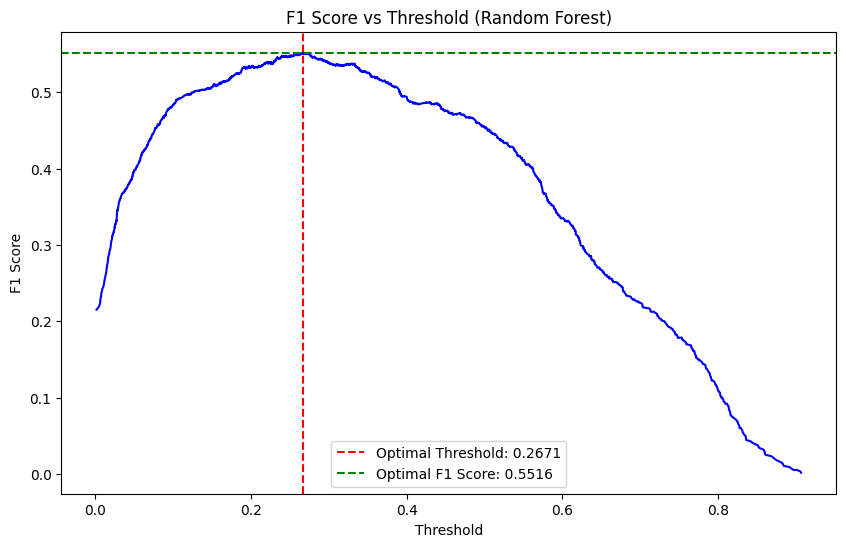

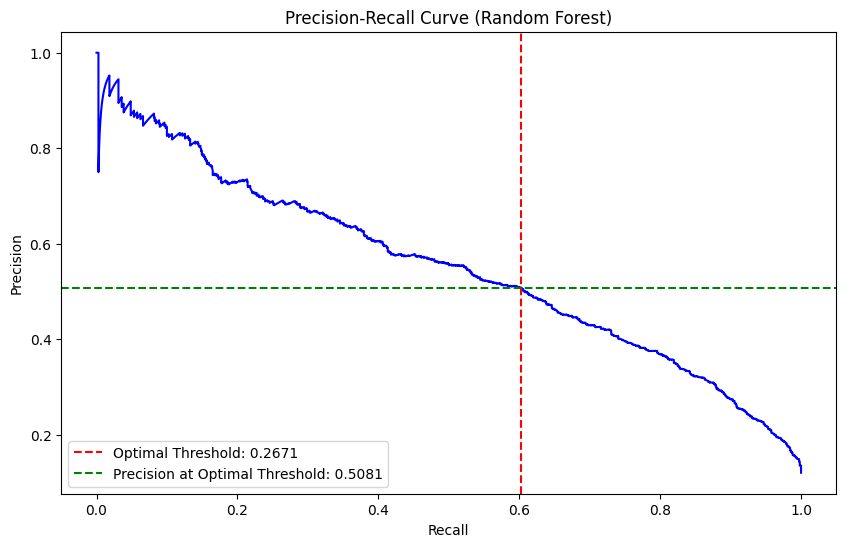


Default Threshold (0.5) F1 Score: 0.4548
Improvement in F1 Score: 0.0967

Metrics at threshold 0.5:
Accuracy: 0.8979
Precision: 0.6395
Recall: 0.3529
F1 Score: 0.4548
ROC AUC Score: 0.8829

Metrics at threshold 0.2671422625225691:
Accuracy: 0.8817
Precision: 0.5081
Recall: 0.6031
F1 Score: 0.5516
ROC AUC Score: 0.8829

Top 10 most important features at optimal threshold:
                feature  importance
0              duration    0.568437
5      poutcome_success    0.178668
1                 pdays    0.083980
10          housing_yes    0.064013
2              previous    0.035973
3              campaign    0.032810
6      poutcome_unknown    0.015390
8    education_tertiary    0.009231
7   education_secondary    0.004342
4        poutcome_other    0.004073


<Figure size 1000x600 with 0 Axes>

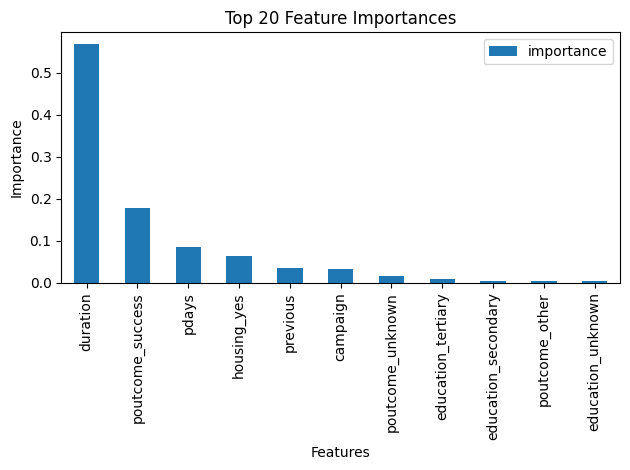

In [21]:
# Get predicted probabilities
y_pred_proba = best_rf.predict_proba(X_test)[:, 1]

# Calculate precision, recall, and thresholds
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_proba)

# Calculate F1 score for each threshold
f1_scores = 2 * (precision * recall) / (precision + recall)

# Find the index of the maximum F1 score
optimal_idx = np.argmax(f1_scores)
optimal_threshold = thresholds[optimal_idx]
optimal_f1_score = f1_scores[optimal_idx]

print(f"Optimal Threshold: {optimal_threshold:.4f}")
print(f"Optimal F1 Score: {optimal_f1_score:.4f}")

# Apply the optimal threshold to get predictions
y_pred_optimal = (y_pred_proba >= optimal_threshold).astype(int)

# Calculate and print the classification report with the optimal threshold
print("\nClassification Report with Optimal Threshold:")
print(classification_report(y_test, y_pred_optimal))

# Plot F1 score vs threshold
plt.figure(figsize=(10, 6))
plt.plot(thresholds, f1_scores[:-1], 'b-')
plt.xlabel('Threshold')
plt.ylabel('F1 Score')
plt.title('F1 Score vs Threshold (Random Forest)')
plt.axvline(x=optimal_threshold, color='r', linestyle='--', label=f'Optimal Threshold: {optimal_threshold:.4f}')
plt.axhline(y=optimal_f1_score, color='g', linestyle='--', label=f'Optimal F1 Score: {optimal_f1_score:.4f}')
plt.legend()
plt.show()

# Plot Precision-Recall curve
plt.figure(figsize=(10, 6))
plt.plot(recall, precision, 'b-')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve (Random Forest)')
plt.axvline(x=recall[optimal_idx], color='r', linestyle='--', label=f'Optimal Threshold: {optimal_threshold:.4f}')
plt.axhline(y=precision[optimal_idx], color='g', linestyle='--', label=f'Precision at Optimal Threshold: {precision[optimal_idx]:.4f}')
plt.legend()
plt.show()

# Compare with default threshold (0.5)
y_pred_default = (y_pred_proba >= 0.5).astype(int)
default_f1_score = f1_score(y_test, y_pred_default)

print(f"\nDefault Threshold (0.5) F1 Score: {default_f1_score:.4f}")
print(f"Improvement in F1 Score: {optimal_f1_score - default_f1_score:.4f}")

# Function to calculate and print metrics
def print_metrics(y_true, y_pred, threshold):
    print(f"\nMetrics at threshold {threshold}:")
    print(f"Accuracy: {accuracy_score(y_true, y_pred):.4f}")
    print(f"Precision: {precision_score(y_true, y_pred):.4f}")
    print(f"Recall: {recall_score(y_true, y_pred):.4f}")
    print(f"F1 Score: {f1_score(y_true, y_pred):.4f}")
    print(f"ROC AUC Score: {roc_auc_score(y_true, y_pred_proba):.4f}")

# Print metrics for default and optimal thresholds
print_metrics(y_test, y_pred_default, 0.5)
print_metrics(y_test, y_pred_optimal, optimal_threshold)

# Feature importance at optimal threshold
feature_importance = pd.DataFrame({
    'feature': X_test.columns,
    'importance': best_rf.feature_importances_
})
feature_importance = feature_importance.sort_values('importance', ascending=False)

print("\nTop 10 most important features at optimal threshold:")
print(feature_importance.head(10))

# Plot feature importances
plt.figure(figsize=(10, 6))
feature_importance.head(20).plot(x='feature', y='importance', kind='bar')
plt.title('Top 20 Feature Importances')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

3. AdaBoost

c:\Users\NeilXu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_search.py:318: UserWarning: The total space of parameters 9 is smaller than n_iter=10. Running 9 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
c:\Users\NeilXu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Best parameters: {'n_estimators': 100, 'learning_rate': 0.1}
Best cross-validation score: 0.45338272705482

Performance Scores:
Accuracy: 0.8977
Precision: 0.6374
Recall: 0.3529
F1 Score: 0.4543
ROC AUC Score: 0.8827


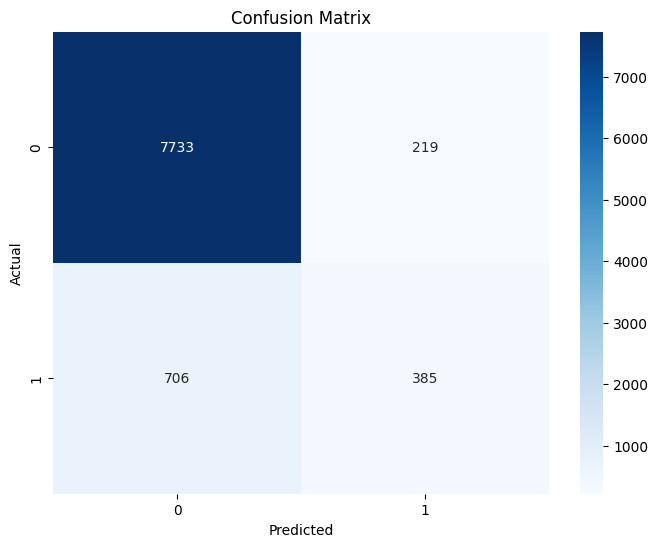


Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.97      0.94      7952
           1       0.64      0.35      0.45      1091

    accuracy                           0.90      9043
   macro avg       0.78      0.66      0.70      9043
weighted avg       0.88      0.90      0.88      9043



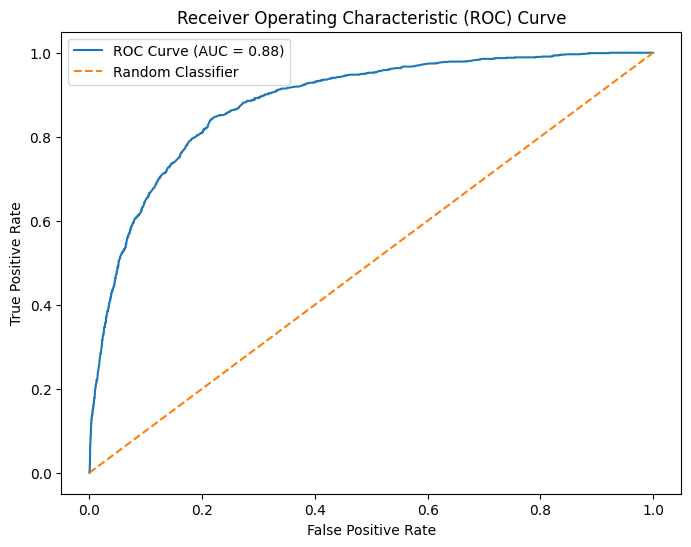


Timing Information:
Total time to run random search: 13.06 seconds
Time per iteration: 1.31 seconds

Top 10 most important features:
                feature  importance
0              duration    0.451869
1                 pdays    0.211634
3              campaign    0.089538
10          housing_yes    0.073750
8    education_tertiary    0.051261
5      poutcome_success    0.046016
2              previous    0.044920
7   education_secondary    0.016683
4        poutcome_other    0.008176
9     education_unknown    0.005170


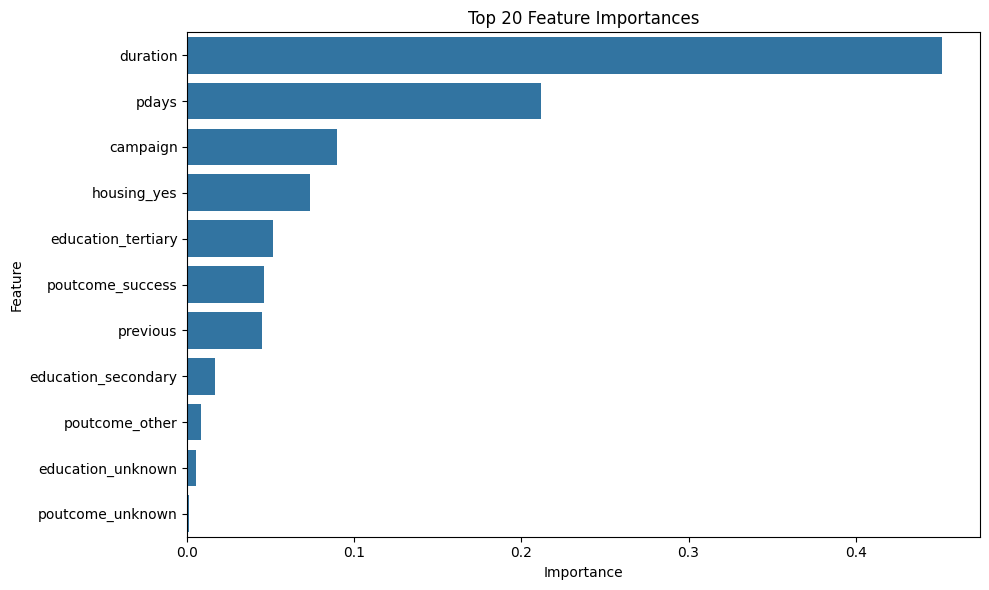

In [23]:
from sklearn import __version__ as sklearn_version


# Define a simplified parameter distribution for random search
param_dist = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 1.0],
}

# Create the base estimator
base_estimator = DecisionTreeClassifier(max_depth=3, random_state=42)

# Create the AdaBoost classifier based on scikit-learn version
if sklearn_version >= "0.22":
    adaboost = AdaBoostClassifier(estimator=base_estimator, random_state=42)
else:
    adaboost = AdaBoostClassifier(base_estimator=base_estimator, random_state=42)

# Create the random search object with fewer iterations
random_search = RandomizedSearchCV(
    adaboost,
    param_distributions=param_dist,
    n_iter=10,  # Reduced number of iterations
    cv=3,  # Reduced number of cross-validation folds
    scoring='f1',
    n_jobs=-1,
    random_state=42
)

# Perform random search
start_time = time.time()
random_search.fit(X_train, y_train)
end_time = time.time()

# Print the best parameters and score
print("Best parameters:", random_search.best_params_)
print("Best cross-validation score:", random_search.best_score_)

# Get the best model
best_adaboost = random_search.best_estimator_

# Make predictions on the test set
y_pred = best_adaboost.predict(X_test)
y_pred_proba = best_adaboost.predict_proba(X_test)[:, 1]

# Calculate performance metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)

print("\nPerformance Scores:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"ROC AUC Score: {roc_auc:.4f}")

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', label='Random Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

# Timing Information
total_time = end_time - start_time
n_iter = random_search.n_iter
time_per_iter = total_time / n_iter

print("\nTiming Information:")
print(f"Total time to run random search: {total_time:.2f} seconds")
print(f"Time per iteration: {time_per_iter:.2f} seconds")

# Feature Importance
feature_importance = pd.DataFrame({
    'feature': X_train.columns,
    'importance': best_adaboost.feature_importances_
})
feature_importance = feature_importance.sort_values('importance', ascending=False)

print("\nTop 10 most important features:")
print(feature_importance.head(10))

# Plot feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='importance', y='feature', data=feature_importance.head(20))
plt.title('Top 20 Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

Optimal Threshold: 0.4750
Optimal F1 Score: 0.5530

Classification Report with Optimal Threshold:
              precision    recall  f1-score   support

           0       0.94      0.92      0.93      7952
           1       0.51      0.60      0.55      1091

    accuracy                           0.88      9043
   macro avg       0.73      0.76      0.74      9043
weighted avg       0.89      0.88      0.89      9043



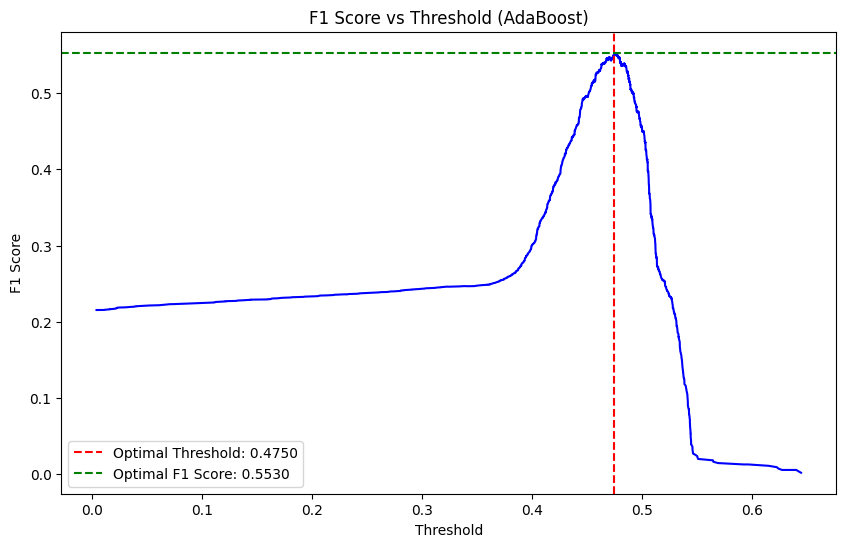

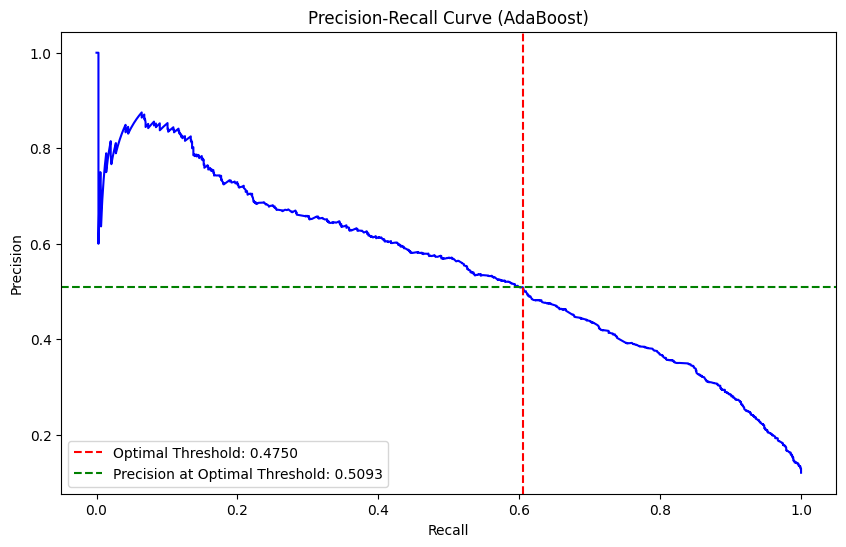


Default Threshold (0.5) F1 Score: 0.4543
Improvement in F1 Score: 0.0987

Metrics at threshold 0.5:
Accuracy: 0.8977
Precision: 0.6374
Recall: 0.3529
F1 Score: 0.4543
ROC AUC Score: 0.8827

Metrics at threshold 0.47498318209921486:
Accuracy: 0.8820
Precision: 0.5093
Recall: 0.6049
F1 Score: 0.5530
ROC AUC Score: 0.8827

Top 10 most important features at optimal threshold:
                feature  importance
0              duration    0.451869
1                 pdays    0.211634
3              campaign    0.089538
10          housing_yes    0.073750
8    education_tertiary    0.051261
5      poutcome_success    0.046016
2              previous    0.044920
7   education_secondary    0.016683
4        poutcome_other    0.008176
9     education_unknown    0.005170


<Figure size 1000x600 with 0 Axes>

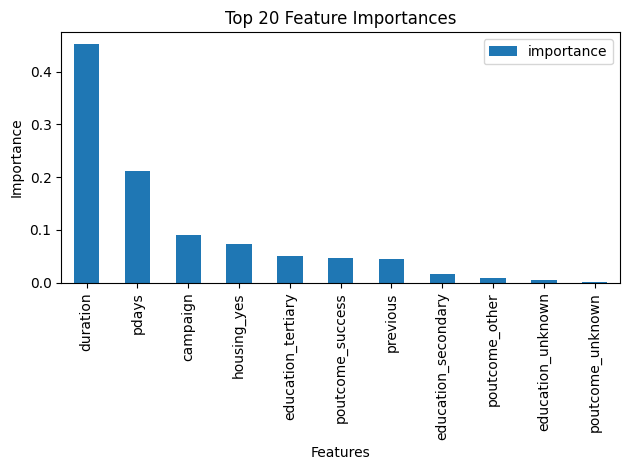

In [24]:
# Get predicted probabilities
y_pred_proba = best_adaboost.predict_proba(X_test)[:, 1]

# Calculate precision, recall, and thresholds
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_proba)

# Calculate F1 score for each threshold
f1_scores = 2 * (precision * recall) / (precision + recall)

# Find the index of the maximum F1 score
optimal_idx = np.argmax(f1_scores)
optimal_threshold = thresholds[optimal_idx]
optimal_f1_score = f1_scores[optimal_idx]

print(f"Optimal Threshold: {optimal_threshold:.4f}")
print(f"Optimal F1 Score: {optimal_f1_score:.4f}")

# Apply the optimal threshold to get predictions
y_pred_optimal = (y_pred_proba >= optimal_threshold).astype(int)

# Calculate and print the classification report with the optimal threshold
print("\nClassification Report with Optimal Threshold:")
print(classification_report(y_test, y_pred_optimal))

# Plot F1 score vs threshold
plt.figure(figsize=(10, 6))
plt.plot(thresholds, f1_scores[:-1], 'b-')
plt.xlabel('Threshold')
plt.ylabel('F1 Score')
plt.title('F1 Score vs Threshold (AdaBoost)')
plt.axvline(x=optimal_threshold, color='r', linestyle='--', label=f'Optimal Threshold: {optimal_threshold:.4f}')
plt.axhline(y=optimal_f1_score, color='g', linestyle='--', label=f'Optimal F1 Score: {optimal_f1_score:.4f}')
plt.legend()
plt.show()

# Plot Precision-Recall curve
plt.figure(figsize=(10, 6))
plt.plot(recall, precision, 'b-')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve (AdaBoost)')
plt.axvline(x=recall[optimal_idx], color='r', linestyle='--', label=f'Optimal Threshold: {optimal_threshold:.4f}')
plt.axhline(y=precision[optimal_idx], color='g', linestyle='--', label=f'Precision at Optimal Threshold: {precision[optimal_idx]:.4f}')
plt.legend()
plt.show()

# Compare with default threshold (0.5)
y_pred_default = (y_pred_proba >= 0.5).astype(int)
default_f1_score = f1_score(y_test, y_pred_default)

print(f"\nDefault Threshold (0.5) F1 Score: {default_f1_score:.4f}")
print(f"Improvement in F1 Score: {optimal_f1_score - default_f1_score:.4f}")

# Function to calculate and print metrics
def print_metrics(y_true, y_pred, threshold):
    print(f"\nMetrics at threshold {threshold}:")
    print(f"Accuracy: {accuracy_score(y_true, y_pred):.4f}")
    print(f"Precision: {precision_score(y_true, y_pred):.4f}")
    print(f"Recall: {recall_score(y_true, y_pred):.4f}")
    print(f"F1 Score: {f1_score(y_true, y_pred):.4f}")
    print(f"ROC AUC Score: {roc_auc_score(y_true, y_pred_proba):.4f}")

# Print metrics for default and optimal thresholds
print_metrics(y_test, y_pred_default, 0.5)
print_metrics(y_test, y_pred_optimal, optimal_threshold)

# Feature importance at optimal threshold
feature_importance = pd.DataFrame({
    'feature': X_test.columns,
    'importance': best_adaboost.feature_importances_
})
feature_importance = feature_importance.sort_values('importance', ascending=False)

print("\nTop 10 most important features at optimal threshold:")
print(feature_importance.head(10))

# Plot feature importances
plt.figure(figsize=(10, 6))
feature_importance.head(20).plot(x='feature', y='importance', kind='bar')
plt.title('Top 20 Feature Importances')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

4. Bagging Classifier

Best parameters: {'n_estimators': 10, 'max_samples': 0.5, 'max_features': 1.0, 'bootstrap_features': False, 'bootstrap': True}
Best cross-validation score: 0.39765514630369553

Performance Scores:
Accuracy: 0.8801
Precision: 0.5051
Recall: 0.3199
F1 Score: 0.3917
ROC AUC Score: 0.8148


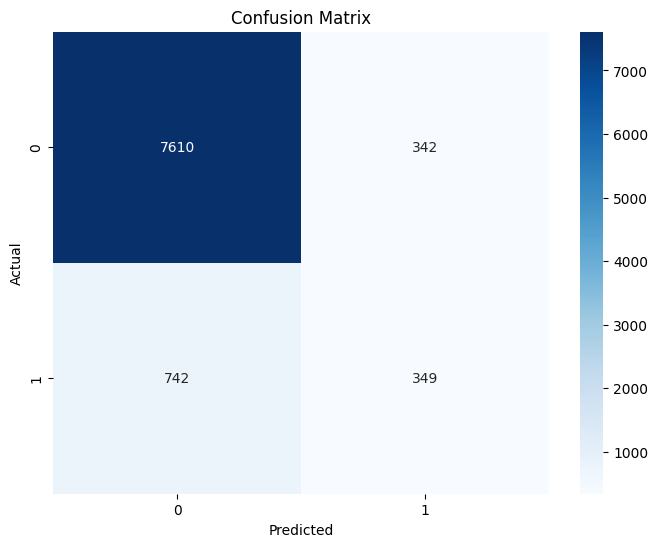


Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.96      0.93      7952
           1       0.51      0.32      0.39      1091

    accuracy                           0.88      9043
   macro avg       0.71      0.64      0.66      9043
weighted avg       0.86      0.88      0.87      9043



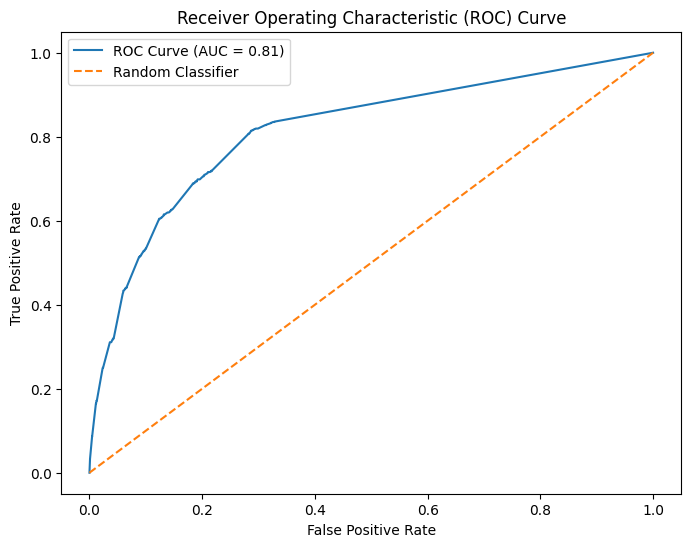


Timing Information:
Total time to run random search: 19.09 seconds
Time per iteration: 1.91 seconds

Top 10 most important features:
                feature  importance
0              duration    0.555856
5      poutcome_success    0.104348
1                 pdays    0.096848
3              campaign    0.095011
7   education_secondary    0.034031
10          housing_yes    0.033546
2              previous    0.031994
8    education_tertiary    0.026437
9     education_unknown    0.011049
4        poutcome_other    0.006933


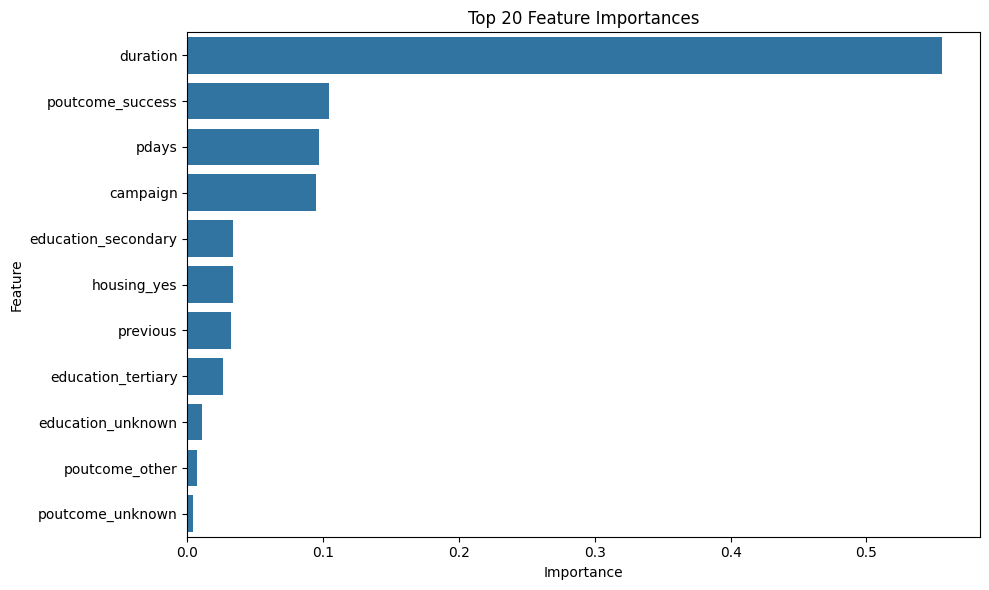

In [25]:
# Define a simplified parameter distribution for random search
param_dist = {
    'n_estimators': [10, 50, 100],
    'max_samples': [0.5, 0.7, 1.0],
    'max_features': [0.5, 0.7, 1.0],
    'bootstrap': [True, False],
    'bootstrap_features': [True, False]
}

# Create the base estimator
base_estimator = DecisionTreeClassifier(random_state=42)

# Create the Bagging classifier based on scikit-learn version
if sklearn_version >= "0.22":
    bagging = BaggingClassifier(estimator=base_estimator, random_state=42)
else:
    bagging = BaggingClassifier(base_estimator=base_estimator, random_state=42)

# Create the random search object with fewer iterations
random_search = RandomizedSearchCV(
    bagging,
    param_distributions=param_dist,
    n_iter=10,  # Reduced number of iterations
    cv=3,  # Reduced number of cross-validation folds
    scoring='f1',
    n_jobs=-1,
    random_state=42
)

# Perform random search
start_time = time.time()
random_search.fit(X_train, y_train)
end_time = time.time()

# Print the best parameters and score
print("Best parameters:", random_search.best_params_)
print("Best cross-validation score:", random_search.best_score_)

# Get the best model
best_bagging = random_search.best_estimator_

# Make predictions on the test set
y_pred = best_bagging.predict(X_test)
y_pred_proba = best_bagging.predict_proba(X_test)[:, 1]

# Calculate performance metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)

print("\nPerformance Scores:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"ROC AUC Score: {roc_auc:.4f}")

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', label='Random Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

# Timing Information
total_time = end_time - start_time
n_iter = random_search.n_iter
time_per_iter = total_time / n_iter

print("\nTiming Information:")
print(f"Total time to run random search: {total_time:.2f} seconds")
print(f"Time per iteration: {time_per_iter:.2f} seconds")

# Feature Importance (using mean feature importance of base estimators)
feature_importance = np.mean([tree.feature_importances_ for tree in best_bagging.estimators_], axis=0)
feature_importance_df = pd.DataFrame({
    'feature': X_train.columns,
    'importance': feature_importance
})
feature_importance_df = feature_importance_df.sort_values('importance', ascending=False)

print("\nTop 10 most important features:")
print(feature_importance_df.head(10))

# Plot feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='importance', y='feature', data=feature_importance_df.head(20))
plt.title('Top 20 Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

Optimal Threshold: 0.2917
Optimal F1 Score: 0.4825

Classification Report with Optimal Threshold:
              precision    recall  f1-score   support

           0       0.94      0.88      0.91      7952
           1       0.40      0.60      0.48      1091

    accuracy                           0.84      9043
   macro avg       0.67      0.74      0.70      9043
weighted avg       0.88      0.84      0.86      9043



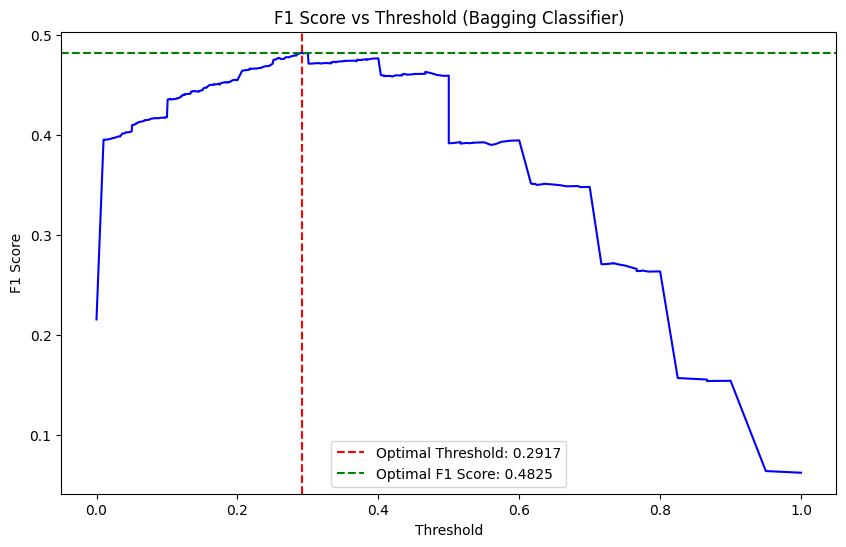

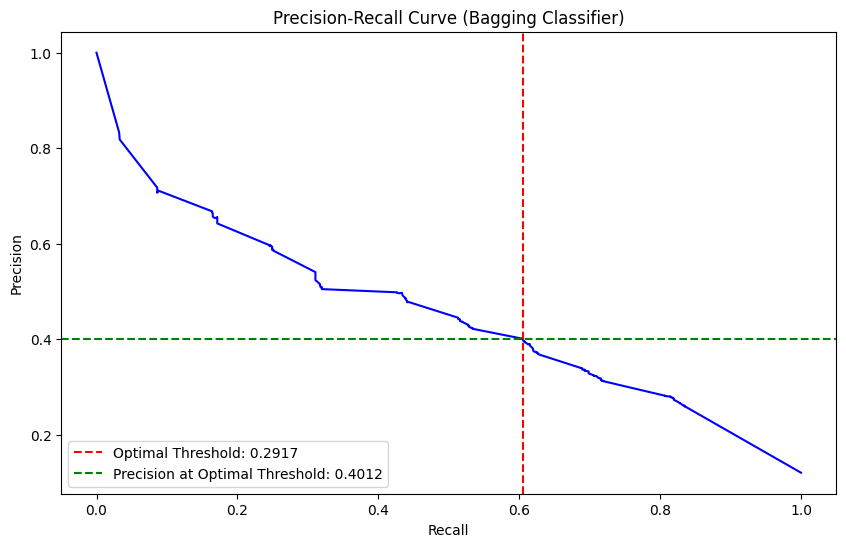


Default Threshold (0.5) F1 Score: 0.4595
Improvement in F1 Score: 0.0230

Metrics at threshold 0.5:
Accuracy: 0.8790
Precision: 0.4984
Recall: 0.4262
F1 Score: 0.4595
ROC AUC Score: 0.8148

Metrics at threshold 0.29166666666666663:
Accuracy: 0.8434
Precision: 0.4012
Recall: 0.6049
F1 Score: 0.4825
ROC AUC Score: 0.8148

Top 10 most important features at optimal threshold:
                feature  importance
0              duration    0.555856
5      poutcome_success    0.104348
1                 pdays    0.096848
3              campaign    0.095011
7   education_secondary    0.034031
10          housing_yes    0.033546
2              previous    0.031994
8    education_tertiary    0.026437
9     education_unknown    0.011049
4        poutcome_other    0.006933


<Figure size 1000x600 with 0 Axes>

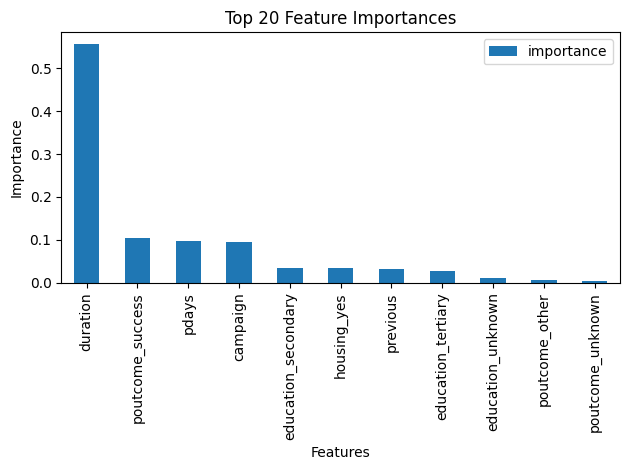

In [26]:
# Assuming best_bagging, X_test, and y_test are available from the previous run
# If not, you need to run the Bagging Classifier random search code first

# Get predicted probabilities
y_pred_proba = best_bagging.predict_proba(X_test)[:, 1]

# Calculate precision, recall, and thresholds
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_proba)

# Calculate F1 score for each threshold
f1_scores = 2 * (precision * recall) / (precision + recall)

# Find the index of the maximum F1 score
optimal_idx = np.argmax(f1_scores)
optimal_threshold = thresholds[optimal_idx]
optimal_f1_score = f1_scores[optimal_idx]

print(f"Optimal Threshold: {optimal_threshold:.4f}")
print(f"Optimal F1 Score: {optimal_f1_score:.4f}")

# Apply the optimal threshold to get predictions
y_pred_optimal = (y_pred_proba >= optimal_threshold).astype(int)

# Calculate and print the classification report with the optimal threshold
print("\nClassification Report with Optimal Threshold:")
print(classification_report(y_test, y_pred_optimal))

# Plot F1 score vs threshold
plt.figure(figsize=(10, 6))
plt.plot(thresholds, f1_scores[:-1], 'b-')
plt.xlabel('Threshold')
plt.ylabel('F1 Score')
plt.title('F1 Score vs Threshold (Bagging Classifier)')
plt.axvline(x=optimal_threshold, color='r', linestyle='--', label=f'Optimal Threshold: {optimal_threshold:.4f}')
plt.axhline(y=optimal_f1_score, color='g', linestyle='--', label=f'Optimal F1 Score: {optimal_f1_score:.4f}')
plt.legend()
plt.show()

# Plot Precision-Recall curve
plt.figure(figsize=(10, 6))
plt.plot(recall, precision, 'b-')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve (Bagging Classifier)')
plt.axvline(x=recall[optimal_idx], color='r', linestyle='--', label=f'Optimal Threshold: {optimal_threshold:.4f}')
plt.axhline(y=precision[optimal_idx], color='g', linestyle='--', label=f'Precision at Optimal Threshold: {precision[optimal_idx]:.4f}')
plt.legend()
plt.show()

# Compare with default threshold (0.5)
y_pred_default = (y_pred_proba >= 0.5).astype(int)
default_f1_score = f1_score(y_test, y_pred_default)

print(f"\nDefault Threshold (0.5) F1 Score: {default_f1_score:.4f}")
print(f"Improvement in F1 Score: {optimal_f1_score - default_f1_score:.4f}")

# Function to calculate and print metrics
def print_metrics(y_true, y_pred, threshold):
    print(f"\nMetrics at threshold {threshold}:")
    print(f"Accuracy: {accuracy_score(y_true, y_pred):.4f}")
    print(f"Precision: {precision_score(y_true, y_pred):.4f}")
    print(f"Recall: {recall_score(y_true, y_pred):.4f}")
    print(f"F1 Score: {f1_score(y_true, y_pred):.4f}")
    print(f"ROC AUC Score: {roc_auc_score(y_true, y_pred_proba):.4f}")

# Print metrics for default and optimal thresholds
print_metrics(y_test, y_pred_default, 0.5)
print_metrics(y_test, y_pred_optimal, optimal_threshold)

# Feature importance (using mean feature importance of base estimators)
feature_importance = np.mean([tree.feature_importances_ for tree in best_bagging.estimators_], axis=0)
feature_importance_df = pd.DataFrame({
    'feature': X_test.columns,
    'importance': feature_importance
})
feature_importance_df = feature_importance_df.sort_values('importance', ascending=False)

print("\nTop 10 most important features at optimal threshold:")
print(feature_importance_df.head(10))

# Plot feature importances
plt.figure(figsize=(10, 6))
feature_importance_df.head(20).plot(x='feature', y='importance', kind='bar')
plt.title('Top 20 Feature Importances')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

5. Voting Classifier (soft voting)

c:\Users\NeilXu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
21 fits failed out of a total of 30.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
21 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\NeilXu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\NeilXu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py", line 1474, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\NeilXu\Ap

Best parameters: {'lr__penalty': 'l2', 'lr__C': 10, 'knn__weights': 'distance', 'knn__n_neighbors': 5, 'dt__min_samples_split': 5, 'dt__max_depth': 7}
Best cross-validation score: 0.44388588649675637

Performance Scores:
Accuracy: 0.8963
Precision: 0.6256
Recall: 0.3492
F1 Score: 0.4482
ROC AUC Score: 0.8736


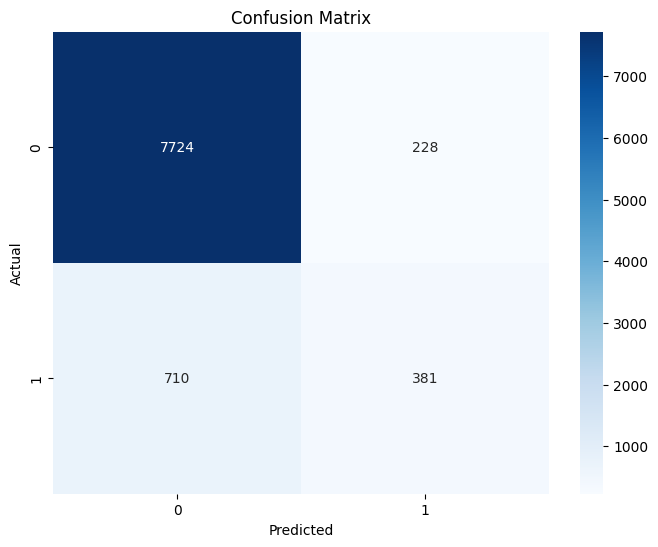


Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.97      0.94      7952
           1       0.63      0.35      0.45      1091

    accuracy                           0.90      9043
   macro avg       0.77      0.66      0.70      9043
weighted avg       0.88      0.90      0.88      9043



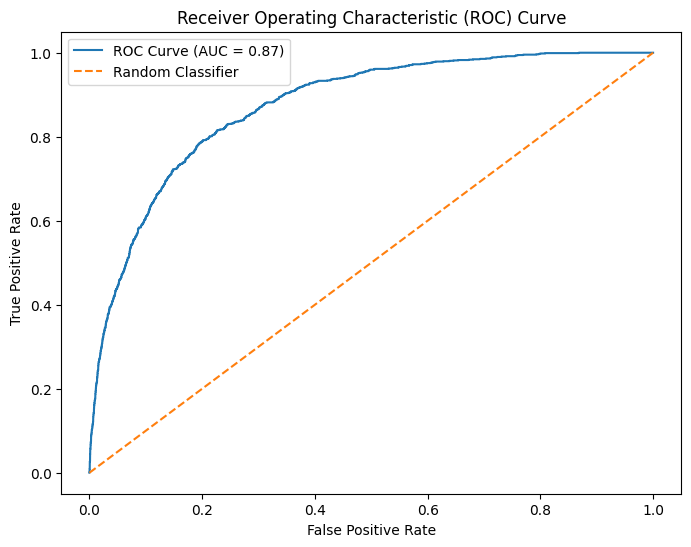


Timing Information:
Total time to run random search: 4.87 seconds
Time per iteration: 0.49 seconds

Note: Voting Classifier doesn't provide direct feature importance.
To get feature importance, you would need to examine each base model separately.


In [32]:
# Define base models
logreg = LogisticRegression(random_state=42)
knn = KNeighborsClassifier()
dt = DecisionTreeClassifier(random_state=42)

# Create the Voting Classifier
voting_clf = VotingClassifier(
    estimators=[('lr', logreg), ('knn', knn), ('dt', dt)],
    voting='soft'
)

# Define parameter distributions for random search
param_dist = {
    'lr__C': [0.1, 1, 10],
    'lr__penalty': ['l1', 'l2'],
    'knn__n_neighbors': [3, 5, 7],
    'knn__weights': ['uniform', 'distance'],
    'dt__max_depth': [3, 5, 7, None],
    'dt__min_samples_split': [2, 5, 10]
}

# Create the random search object
random_search = RandomizedSearchCV(
    voting_clf,
    param_distributions=param_dist,
    n_iter=10,  # Reduced number of iterations
    cv=3,  # Reduced number of cross-validation folds
    scoring='f1',
    n_jobs=-1,
    random_state=42
)

# Perform random search
start_time = time.time()
random_search.fit(X_train, y_train)
end_time = time.time()

# Print the best parameters and score
print("Best parameters:", random_search.best_params_)
print("Best cross-validation score:", random_search.best_score_)

# Get the best model
best_voting_clf = random_search.best_estimator_

# Make predictions on the test set
y_pred = best_voting_clf.predict(X_test)
y_pred_proba = best_voting_clf.predict_proba(X_test)[:, 1]

# Calculate performance metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)

print("\nPerformance Scores:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"ROC AUC Score: {roc_auc:.4f}")

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', label='Random Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

# Timing Information
total_time = end_time - start_time
n_iter = random_search.n_iter
time_per_iter = total_time / n_iter

print("\nTiming Information:")
print(f"Total time to run random search: {total_time:.2f} seconds")
print(f"Time per iteration: {time_per_iter:.2f} seconds")

# Note: Voting Classifier doesn't have built-in feature importance
print("\nNote: Voting Classifier doesn't provide direct feature importance.")
print("To get feature importance, you would need to examine each base model separately.")

    In a voting classifier, individual models (classifiers) make predictions, and the final prediction is based on some form of voting. Adjusting the decision threshold for classification applies to individual models and not directly to the voting classifier itself.
    Hence, for the soft voting, we optimize weights for the base classifiers, giving more influence to models that better optimize F1 score.

Best weights: (1, 2, 1)
Time taken to optimize weights: 72.33 seconds

Optimal Threshold: 0.2437
Optimal F1 Score: 0.4994

Performance Scores:
Accuracy: 0.8517
Precision: 0.4213
Recall: 0.6132
F1 Score: 0.4994
ROC AUC Score: 0.8598

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.88      0.91      7952
           1       0.42      0.61      0.50      1091

    accuracy                           0.85      9043
   macro avg       0.68      0.75      0.71      9043
weighted avg       0.88      0.85      0.86      9043



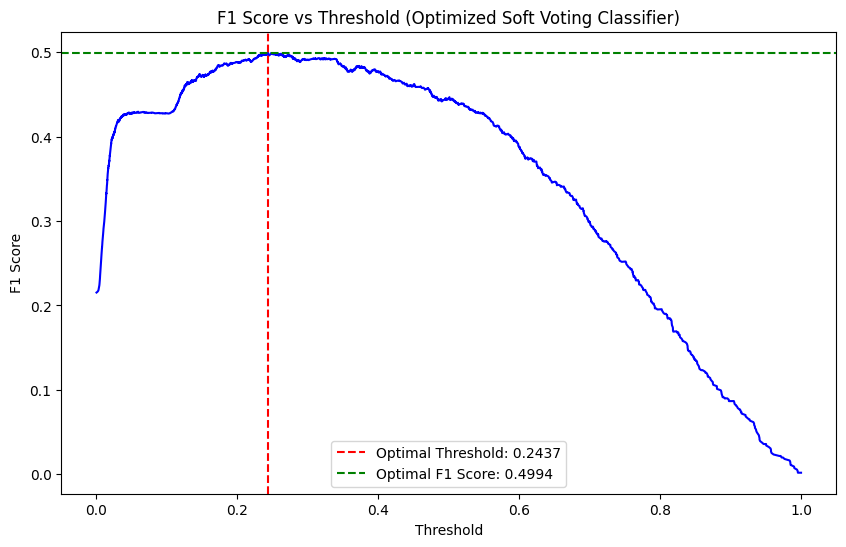

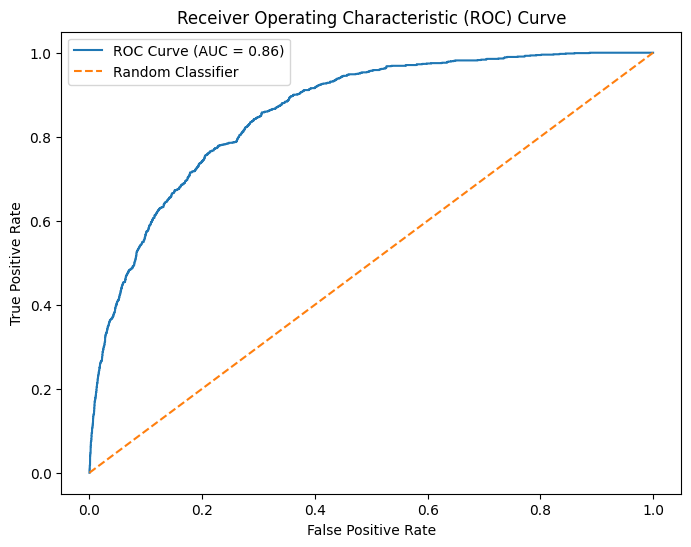

In [37]:
import numpy as np
import pandas as pd
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score, precision_recall_curve, classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, roc_curve
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
from itertools import product
import time

# Assuming X_train, X_test, y_train, y_test are already defined from previous steps

# Define base models
logreg = LogisticRegression(random_state=42)
knn = KNeighborsClassifier()
dt = DecisionTreeClassifier(random_state=42)

# Function to optimize weights
def optimize_weights(X, y, models, model_names, weight_options):
    best_f1 = 0
    best_weights = None
    
    for weights in product(weight_options, repeat=len(models)):
        if sum(weights) == 0:
            continue
        
        vc = VotingClassifier(estimators=list(zip(model_names, models)), voting='soft', weights=weights)
        scores = cross_val_score(vc, X, y, cv=5, scoring='f1')
        avg_f1 = np.mean(scores)
        
        if avg_f1 > best_f1:
            best_f1 = avg_f1
            best_weights = weights
    
    return best_weights

# Optimize weights
start_time = time.time()
weight_options = [0, 1, 2]  # You can adjust these options
best_weights = optimize_weights(X_train, y_train, [logreg, knn, dt], ['lr', 'knn', 'dt'], weight_options)
end_time = time.time()

print(f"Best weights: {best_weights}")
print(f"Time taken to optimize weights: {end_time - start_time:.2f} seconds")

# Create the optimized Voting Classifier
voting_clf = VotingClassifier(
    estimators=[('lr', logreg), ('knn', knn), ('dt', dt)],
    voting='soft',
    weights=best_weights
)

# Fit the model
voting_clf.fit(X_train, y_train)

# Get predicted probabilities
y_pred_proba = voting_clf.predict_proba(X_test)[:, 1]

# Calculate precision, recall, and thresholds
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_proba)

# Calculate F1 score for each threshold
f1_scores = 2 * (precision * recall) / (precision + recall)

# Find the index of the maximum F1 score
optimal_idx = np.argmax(f1_scores)
optimal_threshold = thresholds[optimal_idx]
optimal_f1_score = f1_scores[optimal_idx]

print(f"\nOptimal Threshold: {optimal_threshold:.4f}")
print(f"Optimal F1 Score: {optimal_f1_score:.4f}")

# Apply the optimal threshold to get predictions
y_pred_optimal = (y_pred_proba >= optimal_threshold).astype(int)

# Calculate and print performance metrics
accuracy = accuracy_score(y_test, y_pred_optimal)
precision = precision_score(y_test, y_pred_optimal)
recall = recall_score(y_test, y_pred_optimal)
f1 = f1_score(y_test, y_pred_optimal)
roc_auc = roc_auc_score(y_test, y_pred_proba)

print("\nPerformance Scores:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"ROC AUC Score: {roc_auc:.4f}")

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred_optimal))

# Plot F1 score vs threshold
plt.figure(figsize=(10, 6))
plt.plot(thresholds, f1_scores[:-1], 'b-')
plt.xlabel('Threshold')
plt.ylabel('F1 Score')
plt.title('F1 Score vs Threshold (Optimized Soft Voting Classifier)')
plt.axvline(x=optimal_threshold, color='r', linestyle='--', label=f'Optimal Threshold: {optimal_threshold:.4f}')
plt.axhline(y=optimal_f1_score, color='g', linestyle='--', label=f'Optimal F1 Score: {optimal_f1_score:.4f}')
plt.legend()
plt.show()

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', label='Random Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

6. Voting Classifier (hard voting)

c:\Users\NeilXu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
21 fits failed out of a total of 30.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
21 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\NeilXu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\NeilXu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py", line 1474, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\NeilXu\Ap

Best parameters: {'lr__penalty': 'l2', 'lr__C': 10, 'knn__weights': 'distance', 'knn__n_neighbors': 5, 'dt__min_samples_split': 5, 'dt__max_depth': 7}
Best cross-validation score: 0.448259484850056

Performance Scores:
Accuracy: 0.8985
Precision: 0.6564
Recall: 0.3327
F1 Score: 0.4416


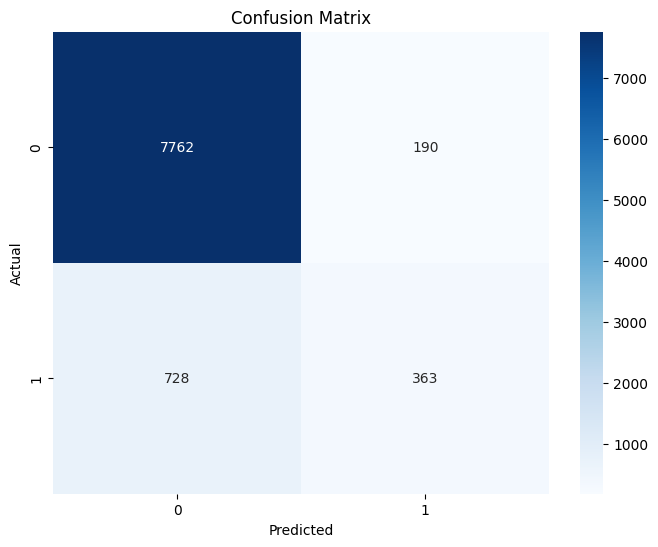


Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.98      0.94      7952
           1       0.66      0.33      0.44      1091

    accuracy                           0.90      9043
   macro avg       0.79      0.65      0.69      9043
weighted avg       0.88      0.90      0.88      9043


Timing Information:
Total time to run random search: 3.67 seconds
Time per iteration: 0.37 seconds

Note: Hard Voting Classifier doesn't provide probability estimates, so ROC AUC score and ROC curve cannot be computed.


In [35]:
# Define base models
logreg = LogisticRegression(random_state=42)
knn = KNeighborsClassifier()
dt = DecisionTreeClassifier(random_state=42)

# Create the Voting Classifier with hard voting
voting_clf = VotingClassifier(
    estimators=[('lr', logreg), ('knn', knn), ('dt', dt)],
    voting='hard'
)

# Define parameter distributions for random search
param_dist = {
    'lr__C': [0.1, 1, 10],
    'lr__penalty': ['l1', 'l2'],
    'knn__n_neighbors': [3, 5, 7],
    'knn__weights': ['uniform', 'distance'],
    'dt__max_depth': [3, 5, 7, None],
    'dt__min_samples_split': [2, 5, 10]
}

# Create the random search object
random_search = RandomizedSearchCV(
    voting_clf,
    param_distributions=param_dist,
    n_iter=10,  # Reduced number of iterations
    cv=3,  # Reduced number of cross-validation folds
    scoring='f1',
    n_jobs=-1,
    random_state=42
)

# Perform random search
start_time = time.time()
random_search.fit(X_train, y_train)
end_time = time.time()

# Print the best parameters and score
print("Best parameters:", random_search.best_params_)
print("Best cross-validation score:", random_search.best_score_)

# Get the best model
best_voting_clf = random_search.best_estimator_

# Make predictions on the test set
y_pred = best_voting_clf.predict(X_test)

# Calculate performance metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("\nPerformance Scores:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Timing Information
total_time = end_time - start_time
n_iter = random_search.n_iter
time_per_iter = total_time / n_iter

print("\nTiming Information:")
print(f"Total time to run random search: {total_time:.2f} seconds")
print(f"Time per iteration: {time_per_iter:.2f} seconds")

print("\nNote: Hard Voting Classifier doesn't provide probability estimates, so ROC AUC score and ROC curve cannot be computed.")

    Hard voting uses final predictions, not probabilities. Thus, changing the threshold for individual classifiers is not  applicable to improving the F1 score in hard voting

# Part 4: Performance Comparison

1. Time Required to Run

2. Performance Score

# Part 5: Interpretation and Justification

1. Why did the ensemble models perform the way they did?

2. If you had to pick one model to implement in business process, which would it be and why?

3. What decision criteria did you use to arrive at this conclusion?